<a href="https://colab.research.google.com/github/michel-phylo/Adera2.0/blob/main/Adera_GAN_update_28_model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
!ls
!pwd

'1858_89267902_CAL_Rezaei_Psychoneuroimmunology_610536 - Contributor agreement_adera1.pdf'
 3adera_mkr_nlx_la_corrected.txt
 3adera_mkr_nlx_la_mkr2.txt
 3adera_mkr_nlx_la.txt
 3adera_mkr.txt
 3adera_vaso_cons.txt
 3adera_vaso_dilation.txt
 3_April_7_31_ANG_VS_CTRL.bgo
 67+60+text
 67+67+text
'6 Curcumine_Shumen-Buffalo 01 ENZYME.xlsx'
 adera1_10_march2.json
 adera1_10_march.json
 adera+18
 adera1_alb2.txt.txt
 adera1.gdoc
 adera1.json
 adera1_sequences.fasta
 adera1_validation_14_dec.xlsx
 adera20_10per
 adera20_30per
 adera_25_may1.txt
 adera+_27_feb+Makarious
 adera_29_june_2_10_pm
 adera_29_june_2_12_pm
 adera_29_june_4_05_pm
 adera_29_june_4_types_Macarious1.txt
 adera_29_june_5_types_Macariou2.txt
 adera_29_june_6_types_Macarious2.txt
 adera_29_june_7_types_Macarious1.txt
 adera_29_june_7_types_Macarious3.txt
 adera2_mkr2.txt
 adera2_patents.csv
 adera2_validation.csv
 adera_30_june_9_am
 adera_30_june_9_am_pm
 adera_32
 Adera_3_April_Ang_Alone_HA.bgo
 Adera_3_April_Ang_NAL_HA.bgo

In [ ]:
class_Adera = {"A": 11,"R": 12,"N": 13,"D": 14,"C":15,"E":16,"Q":17,"G":18,"H":19,"I":20,"L":21,"K":22,"M":23,"F":24,"P":25,"S":26,"T":27,"W":28,"Y":29,"V":30}
#class_Adera = {"A": 991,"R": 2,"N": 389,"D": 416,"C":5,"E":6,"Q":277,"G":8,"H":9,"I":10,"L":11,"K":12,"M":113,"F":14,"P":5,"S":16,"T":7,"W":18,"Y":19,"V":2000}
print(class_Adera["C"])
print(class_Adera.values())

15
dict_values([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])


In [ ]:
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
from IPython import display

import pandas as pd


In [ ]:
#archive_Adera_Figure1
#archive_Adera_Figure1
#archive_Adera_Figure1
#archive_Adera_Figure1
#archive_Adera_Figure1#archive_Adera_Figure1#archive_Adera_Figure1
#archive_Adera_Figure1
#archive_Adera_Figure1
#archive_Adera_Figure1
#archive_Adera_Figure1
#archive_Adera_Figure1
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Load data
adera04 = pd.read_csv("adera_tcr_input_mkr5b.csv", sep=",", header=0)

# Data preprocessing
adera_dimension_data = 2000  # Number of rows for TCR sequences
my_cols = 60  # Maximum number of amino acids per sequence

# Prepare the input matrix
input_results_adera = np.zeros((adera_dimension_data, my_cols))

# Mapping function for amino acids (assuming `class_Adera` is predefined)
class_Adera = {aa: idx for idx, aa in enumerate("ACDEFGHIKLMNPQRSTVWY")}  # Example mapping

for i in range(adera_dimension_data):
    adera_outputstr = adera04.iloc[i, 0]  # Extract sequence
    for j in range(len(adera_outputstr)):
        kr1 = class_Adera.get(adera_outputstr[j], 0)  # Default to 0 if amino acid not found
        input_results_adera[i, j] = kr1

# Output labels (assuming labels are in the second column)
output_results_adera = adera04.iloc[:adera_dimension_data, 1].values


from sklearn.preprocessing import RobustScaler

# Robust Scaler Normalization
scaler = RobustScaler()
input_results_normalized = scaler.fit_transform(input_results_adera)

print("Robust Scaler Normalized Data Shape:", input_results_normalized.shape)

# Split data
X_train, X_val, y_train, y_val = train_test_split(input_results_normalized, output_results_adera, test_size=0.2, random_state=42)

# GAN components
batch_size = 10
latent_dim = 20

# Custom Activation Function
def custom_activation(x):
    min_val = 11
    max_val = 30
    return min_val + (max_val - min_val) * x  # x is in the range [0, 1]

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, LeakyReLU, BatchNormalization, Dropout
from keras.optimizers import Adam

# Custom Activation Function
def custom_activation(x):
    min_val = 11
    max_val = 30
    return min_val + (max_val - min_val) * x  # x is in the range [0, 1]

# Generator
generator = Sequential()
generator.add(Dense(128, input_shape=(latent_dim,)))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization())
generator.add(Dense(64))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization())
generator.add(Dense(32))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization())
generator.add(Dense(60, activation='linear'))
generator.add(Activation(custom_activation))

# Discriminator
discriminator = Sequential()
discriminator.add(Dense(128, input_shape=(my_cols,)))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(64))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(32))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(1, activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5), metrics=['accuracy'])

# GAN
discriminator.trainable = True
gan = Sequential()
gan.add(generator)
gan.add(discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))


# Initialize lists to store metrics
train_d_accuracies = []
val_d_accuracies = []
train_d_losses = []
val_d_losses = []
train_d_precisions = []
val_d_precisions = []
train_d_recalls = []
val_d_recalls = []
train_d_f1_scores = []
val_d_f1_scores = []
train_d_auc = []
val_d_auc = []

# Early Stopping Parameters
patience = 5
best_val_loss = np.inf
best_val_auc = 0
best_val_acc = 0
epochs_no_improve_loss = 0
epochs_no_improve_auc = 0
epochs_no_improve_acc = 0

epochs = 100
eval_frequency = 10

# Convert labels to binary for discriminator training
y_train_binary = (y_train > 0).astype(int)  # Assuming any label > 0 is positive
y_val_binary = (y_val > 0).astype(int)

for epoch in range(epochs):
    # Train Discriminator
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    real_seqs = X_train[idx]
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    gen_seqs = generator.predict(noise)

    # Create labels for real and fake
    real_labels = np.ones((batch_size, 1))  # Real labels: 1
    fake_labels = np.zeros((batch_size, 1))  # Fake labels: 0

    # Train the discriminator
    d_loss_real = discriminator.train_on_batch(real_seqs, real_labels)
    d_loss_fake = discriminator.train_on_batch(gen_seqs, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train Generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    tricked_labels = np.ones((batch_size, 1))  # The generator's goal is to trick the discriminator
    g_loss = gan.train_on_batch(noise, tricked_labels)

    if epoch % eval_frequency == 0 or epoch == epochs - 1:
        # Evaluate Discriminator on training and validation data
        d_loss_train, d_acc_train = discriminator.evaluate(X_train, y_train_binary, verbose=0)
        d_auc_train = roc_auc_score(y_train_binary, discriminator.predict(X_train))

        d_loss_val, d_acc_val = discriminator.evaluate(X_val, y_val_binary, verbose=0)
        d_auc_val = roc_auc_score(y_val_binary, discriminator.predict(X_val))

        # Calculate Precision, Recall, F1-Score for training and validation data
        y_train_pred_probs = discriminator.predict(X_train)
        y_val_pred_probs = discriminator.predict(X_val)

        # Threshold at 0.5
        y_train_pred = (y_train_pred_probs > 0.5).astype(int)
        y_val_pred = (y_val_pred_probs > 0.5).astype(int)

        train_d_precision = precision_score(y_train_binary, y_train_pred, average='macro', zero_division=0)
        val_d_precision = precision_score(y_val_binary, y_val_pred, average='macro', zero_division=0)
        train_d_recall = recall_score(y_train_binary, y_train_pred, average='macro', zero_division=0)
        val_d_recall = recall_score(y_val_binary, y_val_pred, average='macro', zero_division=0)
        train_d_f1 = f1_score(y_train_binary, y_train_pred, average='macro', zero_division=0)
        val_d_f1 = f1_score(y_val_binary, y_val_pred, average='macro', zero_division=0)

        # Store metrics
        train_d_accuracies.append(d_acc_train)
        val_d_accuracies.append(d_acc_val)
        train_d_losses.append(d_loss_train)
        val_d_losses.append(d_loss_val)
        train_d_auc.append(d_auc_train)
        val_d_auc.append(d_auc_val)
        train_d_precisions.append(train_d_precision)
        val_d_precisions.append(val_d_precision)
        train_d_recalls.append(train_d_recall)
        val_d_recalls.append(val_d_recall)
        train_d_f1_scores.append(train_d_f1)
        val_d_f1_scores.append(val_d_f1)

        # Print progress
        print(f"Epoch {epoch}, Discriminator Loss (Train): {d_loss_train:.4f}, Accuracy: {d_acc_train * 100:.2f}%, AUC: {d_auc_train:.4f}, Precision: {train_d_precision:.4f}, Recall: {train_d_recall:.4f}, F1-Score: {train_d_f1:.4f}")
        print(f"Epoch {epoch}, Discriminator Loss (Val): {d_loss_val:.4f}, Accuracy: {d_acc_val * 100:.2f}%, AUC: {d_auc_val:.4f}, Precision: {val_d_precision:.4f}, Recall: {val_d_recall:.4f}, F1-Score: {val_d_f1:.4f}")

        # Early Stopping Checks
        if d_loss_val < best_val_loss:
            best_val_loss = d_loss_val
            epochs_no_improve_loss = 0
        else:
            epochs_no_improve_loss += 1

        if d_auc_val > best_val_auc:
            best_val_auc = d_auc_val
            epochs_no_improve_auc = 0
        else:
            epochs_no_improve_auc += 1

        if d_acc_val > best_val_acc:
            best_val_acc = d_acc_val
            epochs_no_improve_acc = 0
        else:
            epochs_no_improve_acc += 1

        if epochs_no_improve_loss >= patience or epochs_no_improve_auc >= patience or epochs_no_improve_acc >= patience:
            print(f"Early stopping at epoch {epoch} due to no improvement.")
            break


NameError: name 'v' is not defined

In [ ]:
#### archives _adera_ figure1

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Reshape, Flatten, LeakyReLU, Dropout, BatchNormalization
from keras.optimizers import Adam
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

# Load data
adera04 = pd.read_csv("adera_tcr_input_mkr5b.csv", sep=",", header=0)

# Data preprocessing
adera_dimension_data = 2000  # Number of rows for TCR sequences
my_cols = 60  # Maximum number of amino acids per sequence

# Prepare the input matrix
input_results_adera = np.zeros((adera_dimension_data, my_cols))

# Mapping function for amino acids
class_Adera = {aa: idx for idx, aa in enumerate("ACDEFGHIKLMNPQRSTVWY")}  # Example mapping

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Reshape, Flatten, LeakyReLU, Dropout, BatchNormalization
from keras.optimizers import Adam
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

# Load data
adera04 = pd.read_csv("adera_tcr_input_mkr5b.csv", sep=",", header=0)

# Data preprocessing
adera_dimension_data = 2000  # Number of rows for TCR sequences
my_cols = 60  # Maximum number of amino acids per sequence

# Prepare the input matrix
input_results_adera = np.zeros((adera_dimension_data, my_cols))

# Mapping function for amino acids ########model 1 mapped differently from the
class_Adera = {aa: idx for idx, aa in enumerate("ACDEFGHIKLMNPQRSTVWY")}  # Example mapping ########

for i in range(adera_dimension_data):
    adera_outputstr = adera04.iloc[i, 0]  # Extract sequence
    for j in range(len(adera_outputstr)):
        kr1 = class_Adera.get(adera_outputstr[j], 0)  # Default to 0 if amino acid not found
        input_results_adera[i, j] = kr1

# Output labels (assuming labels are in the second column)
output_results_adera = adera04.iloc[:adera_dimension_data, 1].values

# Normalize input data
scaler = RobustScaler()
input_results_normalized = scaler.fit_transform(input_results_adera)

# Split data
X_train, X_val, y_train, y_val = train_test_split(input_results_normalized, output_results_adera, test_size=0.2, random_state=42)

# Convert labels to binary for discriminator training
y_train_binary = (y_train > 0).astype(int)
y_val_binary = (y_val > 0).astype(int)

# GAN components
batch_size = 10
latent_dim = 20
sequence_length = my_cols  # Number of amino acids per sequence

# Custom Activation Function
def custom_activation(x):
    min_val = 11
    max_val = 30
    return min_val + (max_val - min_val) * x  # x is in the range [0, 1]

# Generator with LSTM
generator = Sequential()
generator.add(Dense(128, input_dim=latent_dim))
generator.add(LeakyReLU(negative_slope=0.2))
generator.add(BatchNormalization())
generator.add(Dense(sequence_length * 64))  # Ensure total size matches sequence_length * features
generator.add(Reshape((sequence_length, 64)))  # Reshape to (sequence_length, 64)
generator.add(LSTM(128, return_sequences=True))
generator.add(LSTM(64, return_sequences=True))
generator.add(Dense(1, activation='sigmoid'))  # Output shape should match (sequence_length, 1)

# Discriminator with LSTM
discriminator = Sequential()
discriminator.add(LSTM(64, input_shape=(sequence_length, 1), return_sequences=True))
discriminator.add(LSTM(32))
discriminator.add(Dense(1, activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5), metrics=['accuracy'])

# Create GAN model
discriminator.trainable = True
gan = Sequential()
gan.add(generator)
gan.add(discriminator)

gan.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))

# Initialize lists to store metrics
train_d_accuracies = []
val_d_accuracies = []
train_d_losses = []
val_d_losses = []
train_d_auc = []
val_d_auc = []

# Early Stopping Parameters
patience = 5
best_val_loss = np.inf
best_val_auc = 0
epochs_no_improve_loss = 0
epochs_no_improve_auc = 0

epochs = 100
eval_frequency = 10

for epoch in range(epochs):
    for _ in range(2):  # Train discriminator more frequently
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        real_seqs = X_train[idx].reshape((batch_size, sequence_length, 1))  # Reshape for LSTM input
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        gen_seqs = generator.predict(noise)
        gen_seqs = gen_seqs.reshape((batch_size, sequence_length, 1))  # Reshape for LSTM input

        # Create labels for real and fake
        real_labels = np.ones((batch_size, 1))
        fake_labels = np.zeros((batch_size, 1))

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch(real_seqs, real_labels)
        d_loss_fake = discriminator.train_on_batch(gen_seqs, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train Generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    tricked_labels = np.ones((batch_size, 1))  # Generator tries to fool the discriminator
    g_loss = gan.train_on_batch(noise, tricked_labels)

    if epoch % eval_frequency == 0 or epoch == epochs - 1:
        # Evaluate Discriminator on training and validation data
        d_loss_train, d_acc_train = discriminator.evaluate(X_train.reshape((X_train.shape[0], sequence_length, 1)), y_train_binary, verbose=0)
        d_auc_train = roc_auc_score(y_train_binary, discriminator.predict(X_train.reshape((X_train.shape[0], sequence_length, 1))))

        d_loss_val, d_acc_val = discriminator.evaluate(X_val.reshape((X_val.shape[0], sequence_length, 1)), y_val_binary, verbose=0)
        d_auc_val = roc_auc_score(y_val_binary, discriminator.predict(X_val.reshape((X_val.shape[0], sequence_length, 1))))

        # Store metrics
        train_d_accuracies.append(d_acc_train)
        val_d_accuracies.append(d_acc_val)
        train_d_losses.append(d_loss_train)
        val_d_losses.append(d_loss_val)
        train_d_auc.append(d_auc_train)
        val_d_auc.append(d_auc_val)

        # Print progress
        print(f"Epoch {epoch}, Discriminator Loss (Train): {d_loss_train:.4f}, Accuracy: {d_acc_train * 100:.2f}%, AUC: {d_auc_train:.4f}")
        print(f"Epoch {epoch}, Discriminator Loss (Val): {d_loss_val:.4f}, Accuracy: {d_acc_val * 100:.2f}%, AUC: {d_auc_val:.4f}")

        # Early Stopping Checks
        if d_loss_val < best_val_loss:
            best_val_loss = d_loss_val
            epochs_no_improve_loss = 0
        else:
            epochs_no_improve_loss += 1

        if d_auc_val > best_val_auc:
            best_val_auc = d_auc_val
            epochs_no_improve_auc = 0
        else:
            epochs_no_improve_auc += 1

        if epochs_no_improve_loss >= patience or epochs_no_improve_auc >= patience:
            print(f"Early stopping at epoch {epoch} due to no improvement.")
            break



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step
Epoch 0, Discriminator Loss (Train): 0.6932, Accuracy: 49.94%, AUC: 0.3200
Epoch 0, Discriminator Loss (Val): 0.6932, Accuracy: 50.25%, AUC: 0.3635
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Reshape, Flatten, LeakyReLU, Dropout, BatchNormalization
from keras.optimizers import Adam
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

# Load data
adera04 = pd.read_csv("adera_tcr_input_mkr5b.csv", sep=",", header=0)

# Data preprocessing
adera_dimension_data = 2000  # Number of rows for TCR sequences
my_cols = 60  # Maximum number of amino acids per sequence

# Prepare the input matrix
input_results_adera = np.zeros((adera_dimension_data, my_cols))

# Mapping function for amino acids
class_Adera = {aa: idx for idx, aa in enumerate("ACDEFGHIKLMNPQRSTVWY")}  # Example mapping

for i in range(adera_dimension_data):
    adera_outputstr = adera04.iloc[i, 0]  # Extract sequence
    for j in range(len(adera_outputstr)):
        kr1 = class_Adera.get(adera_outputstr[j], 0)  # Default to 0 if amino acid not found
        input_results_adera[i, j] = kr1

# Output labels (assuming labels are in the second column)
output_results_adera = adera04.iloc[:adera_dimension_data, 1].values

# Normalize input data
scaler = RobustScaler()
input_results_normalized = scaler.fit_transform(input_results_adera)

# Split data
X_train, X_val, y_train, y_val = train_test_split(input_results_normalized, output_results_adera, test_size=0.2, random_state=42)

# Convert labels to binary for discriminator training
y_train_binary = (y_train > 0).astype(int)
y_val_binary = (y_val > 0).astype(int)

# GAN components
batch_size = 10
latent_dim = 20
sequence_length = my_cols  # Number of amino acids per sequence

# Custom Activation Function
def custom_activation(x):
    min_val = 11
    max_val = 30
    return min_val + (max_val - min_val) * x  # x is in the range [0, 1]

# Generator with LSTM
generator = Sequential()
generator.add(Dense(128, input_dim=latent_dim))
generator.add(LeakyReLU(negative_slope=0.2))

generator.add(BatchNormalization())
generator.add(Dense(sequence_length * 64))  # Ensure total size matches sequence_length * features
generator.add(Reshape((sequence_length, 64)))  # Reshape to (sequence_length, 64)
generator.add(LSTM(128, return_sequences=True))
generator.add(Dense(1, activation='sigmoid'))  # Output shape should match (sequence_length, 1)


# Discriminator with LSTM
discriminator = Sequential()
discriminator.add(LSTM(64, input_shape=(sequence_length, 1), return_sequences=True))
discriminator.add(LSTM(32))
discriminator.add(Dense(1, activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001, beta_1=0.5), metrics=['accuracy'])

# Create GAN model
discriminator.trainable = True
gan = Sequential()
gan.add(generator)
gan.add(discriminator)

gan.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001, beta_1=0.5))

# Initialize lists to store metrics
train_d_accuracies = []
val_d_accuracies = []
train_d_losses = []
val_d_losses = []
train_d_auc = []
val_d_auc = []

# Early Stopping Parameters
patience = 5
best_val_loss = np.inf
best_val_auc = 0
epochs_no_improve_loss = 0
epochs_no_improve_auc = 0

epochs = 100
eval_frequency = 10

for epoch in range(epochs):
    for _ in range(2):  # Train discriminator more frequently
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        real_seqs = X_train[idx].reshape((batch_size, sequence_length, 1))  # Reshape for LSTM input
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        gen_seqs = generator.predict(noise)
        gen_seqs = gen_seqs.reshape((batch_size, sequence_length, 1))  # Reshape for LSTM input

        # Create labels for real and fake
        real_labels = np.ones((batch_size, 1))
        fake_labels = np.zeros((batch_size, 1))

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch(real_seqs, real_labels)
        d_loss_fake = discriminator.train_on_batch(gen_seqs, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train Generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    tricked_labels = np.ones((batch_size, 1))  # Generator tries to fool the discriminator
    g_loss = gan.train_on_batch(noise, tricked_labels)

    if epoch % eval_frequency == 0 or epoch == epochs - 1:
        # Evaluate Discriminator on training and validation data
        d_loss_train, d_acc_train = discriminator.evaluate(X_train.reshape((X_train.shape[0], sequence_length, 1)), y_train_binary, verbose=0)
        d_auc_train = roc_auc_score(y_train_binary, discriminator.predict(X_train.reshape((X_train.shape[0], sequence_length, 1))))

        d_loss_val, d_acc_val = discriminator.evaluate(X_val.reshape((X_val.shape[0], sequence_length, 1)), y_val_binary, verbose=0)
        d_auc_val = roc_auc_score(y_val_binary, discriminator.predict(X_val.reshape((X_val.shape[0], sequence_length, 1))))

        # Store metrics
        train_d_accuracies.append(d_acc_train)
        val_d_accuracies.append(d_acc_val)
        train_d_losses.append(d_loss_train)
        val_d_losses.append(d_loss_val)
        train_d_auc.append(d_auc_train)
        val_d_auc.append(d_auc_val)

        # Print progress
        print(f"Epoch {epoch}, Discriminator Loss (Train): {d_loss_train:.4f}, Accuracy: {d_acc_train * 100:.2f}%, AUC: {d_auc_train:.4f}")
        print(f"Epoch {epoch}, Discriminator Loss (Val): {d_loss_val:.4f}, Accuracy: {d_acc_val * 100:.2f}%, AUC: {d_auc_val:.4f}")

        # Early Stopping Checks
        if d_loss_val < best_val_loss:
            best_val_loss = d_loss_val
            epochs_no_improve_loss = 0
        else:
            epochs_no_improve_loss += 1

        if d_auc_val > best_val_auc:
            best_val_auc = d_auc_val
            epochs_no_improve_auc = 0
        else:
            epochs_no_improve_auc += 1

        if epochs_no_improve_loss >= patience or epochs_no_improve_auc >= patience:
            print(f"Early stopping at epoch {epoch} due to no improvement.")
            break



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step
Epoch 0, Discriminator Loss (Train): 0.6931, Accuracy: 49.94%, AUC: 0.6777
Epoch 0, Discriminator Loss (Val): 0.6931, Accuracy: 50.25%, AUC: 0.6256
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━

In [ ]:
generator.summary()
discriminator.summary()
gan.summary()

Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_97 (Dense)                     │ (None, 128)                 │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_20 (LeakyReLU)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_98 (Dense)                     │ (None, 3840)                │         495,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_9 (Reshape)                  │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_26 (LSTM)                       │ (None, 60, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_99 (Dense)                     │ (None, 60, 1)               │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 597,505 (2.28 MB)

 Trainable params: 597,249 (2.28 MB)

 Non-trainable params: 256 (1.00 KB)

Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_27 (LSTM)                       │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_28 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_100 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 88,037 (343.90 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 58,692 (229.27 KB)

Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_49 (Sequential)           │ (10, 60, 1)                 │         597,505 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_50 (Sequential)           │ (10, 1)                     │          29,345 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,880,040 (7.17 MB)

 Trainable params: 626,594 (2.39 MB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 1,253,190 (4.78 MB)

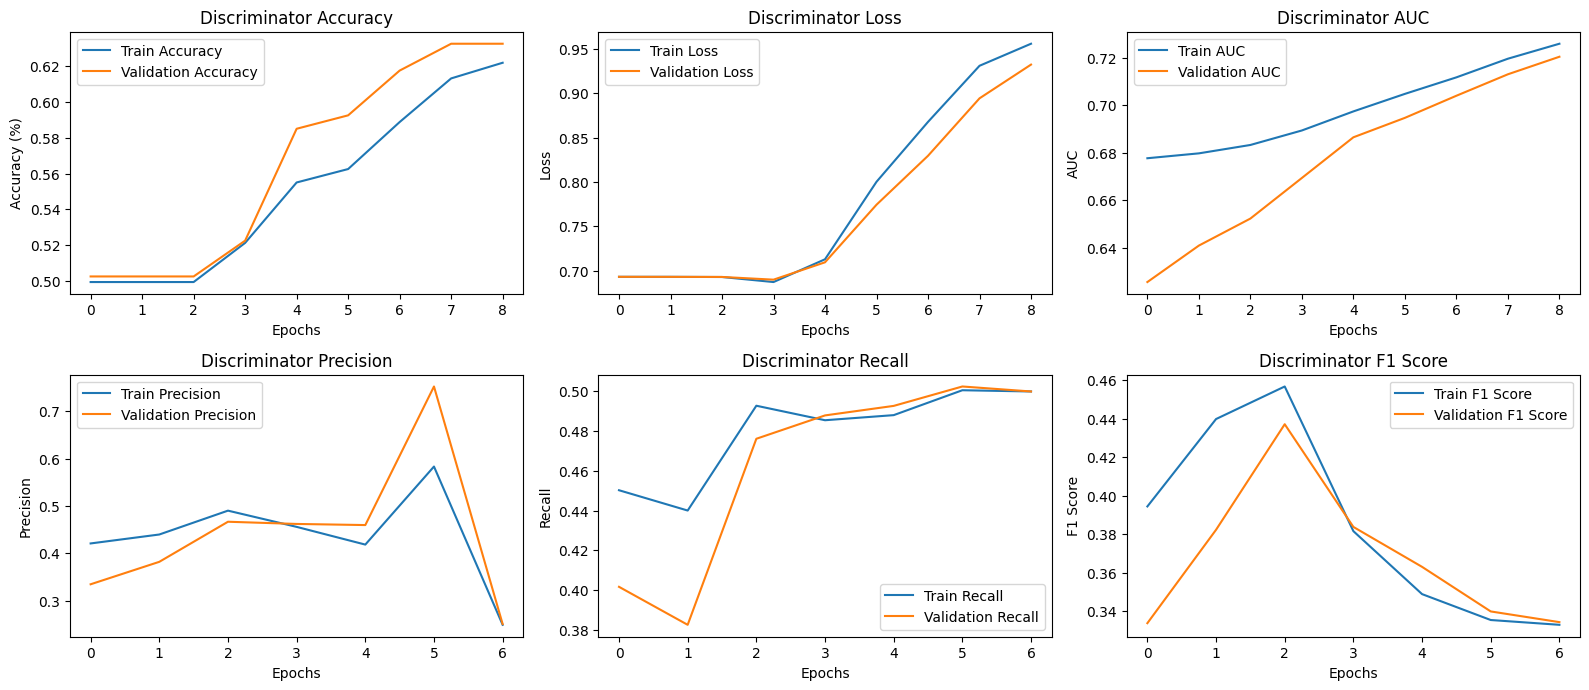

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

sequence_adera = list(range(len(train_d_auc)))  # Ensure this matches the length of your metrics

plt.figure(figsize=(16, 10))

# Plot Discriminator Accuracy
plt.subplot(3, 3, 1)
plt.plot(sequence_adera[:len(train_d_accuracies)], train_d_accuracies, label='Train Accuracy')
plt.plot(sequence_adera[:len(val_d_accuracies)], val_d_accuracies, label='Validation Accuracy')
plt.title('Discriminator Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

# Plot Discriminator Loss
plt.subplot(3, 3, 2)
plt.plot(sequence_adera[:len(train_d_losses)], train_d_losses, label='Train Loss')
plt.plot(sequence_adera[:len(val_d_losses)], val_d_losses, label='Validation Loss')
plt.title('Discriminator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Discriminator AUC
plt.subplot(3, 3, 3)
plt.plot(sequence_adera[:len(train_d_auc)], train_d_auc, label='Train AUC')
plt.plot(sequence_adera[:len(val_d_auc)], val_d_auc, label='Validation AUC')
plt.title('Discriminator AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()

# Plot Discriminator Precision
plt.subplot(3, 3, 4)
if len(train_d_precisions) > 0:
    plt.plot(sequence_adera[:len(train_d_precisions)], train_d_precisions, label='Train Precision')
if len(val_d_precisions) > 0:
    plt.plot(sequence_adera[:len(val_d_precisions)], val_d_precisions, label='Validation Precision')
plt.title('Discriminator Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()

# Plot Discriminator Recall
plt.subplot(3, 3, 5)
if len(train_d_recalls) > 0:
    plt.plot(sequence_adera[:len(train_d_recalls)], train_d_recalls, label='Train Recall')
if len(val_d_recalls) > 0:
    plt.plot(sequence_adera[:len(val_d_recalls)], val_d_recalls, label='Validation Recall')
plt.title('Discriminator Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()

# Plot Discriminator F1 Score
plt.subplot(3, 3, 6)
if len(train_d_f1_scores) > 0:
    plt.plot(sequence_adera[:len(train_d_f1_scores)], train_d_f1_scores, label='Train F1 Score')
if len(val_d_f1_scores) > 0:
    plt.plot(sequence_adera[:len(val_d_f1_scores)], val_d_f1_scores, label='Validation F1 Score')
plt.title('Discriminator F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()






In [ ]:
len(train_d_auc)

43

In [ ]:
# Save the Generator model
generator.save('generator_model_adera28_75c.keras')

# Save the Discriminator model
discriminator.save('discriminator_model_adera28_75c.keras')

# Save the GAN model
#gan.save('gan_model_adera27a.keras')

print("Models have been saved.")


Models have been saved.


In [ ]:
#!pip install tensorflow
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import CustomObjectScope

#from keras.models import load_model
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Activation
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras import models
#from tensorflow.keras import generic_utils
#from tensorflow.keras.utils.generic_utils import CustomObjectScope
# Custom Activation Function
def custom_activation(x):
    min_val = 11
    max_val = 30
    return min_val + (max_val - min_val) * x  # x is in the range [0, 1]
# Load the Generator model
with CustomObjectScope({'custom_activation': custom_activation}):
    generator_adera = load_model('generator_model_adera28_75c.keras') # Load the generator

# Load the Discriminator model
discriminator_adera = load_model('discriminator_model_adera28_75c.keras',
                                custom_objects={'custom_activation': custom_activation})

# Load the GAN model
#gan_adera24 = load_model('gan_model_adera24.keras')

print("Models have been loaded.")


Models have been loaded.


In [ ]:
#figure2
import numpy as np

# Parameters
num_sequences = 100

# Generate noise and transform it
noise = np.random.uniform(0, 1, (num_sequences, latent_dim))  # Generate uniform noise between 0 and 1
noise_transformed_adera = noise * (30 - 11) + 11  # Transform the noise to the range 11 to 30

# Generate sequences
generated_seqs_adera = generator_adera.predict(noise_transformed_adera)

# Rescale to the range 11 to 30
min_val, max_val = generated_seqs_adera.min(), generated_seqs_adera.max()
scaled_seqs_adera = 11 + (generated_seqs_adera - min_val) * (30 - 11) / (max_val - min_val)

# Round to nearest integers and clip to ensure values are within the range [11, 30]
generated_seqs_adera = np.clip(np.round(scaled_seqs_adera).astype(int), 11, 30)

# Print the shape and first few generated sequences
print("Generated sequences shape:", generated_seqs_adera.shape)
print("Generated sequences (first 5):", generated_seqs_adera[:5])

# Classify the generated sequences using the discriminator
generated_seq_probabilities = discriminator_adera.predict(generated_seqs_adera)

# Since we have a single output, we can threshold at 0.5 to classify
generated_seq_labels = (generated_seq_probabilities > 0.1).astype(int)

# Print the shape and values of the discriminator's predictions
print("Discriminator predictions shape:", generated_seq_probabilities.shape)
print("Discriminator predictions (first 5):", generated_seq_probabilities[:5])
print("Generated sequence labels (first 5):", generated_seq_labels.flatten())

# Map the labels to category names
category_mapping = {0: 'Fake', 1: 'Real'}  # Assuming 0: Fake and 1: Real
generated_seq_categories = [category_mapping[label[0]] for label in generated_seq_labels]
print("Generated sequence categories (first 5):", generated_seq_categories)

# Filter sequences to include only Real sequences
filtered_sequences = [
    (seq, category)
    for seq, category in zip(generated_seqs_adera, generated_seq_categories)
    if category == 'Real'
]

print("Filtered sequences (count):", len(filtered_sequences))

# Define the class mapping for amino acids #########class_adera mapping is different for model 1 #####fix it for upcoming models
class_Adera = {"A": 11, "R": 12, "N": 13, "D": 14, "C": 15, "E": 16, "Q": 17, "G": 18, "H": 19, "I": 20,
               "L": 21, "K": 22, "M": 23, "F": 24, "P": 25, "S": 26, "T": 27, "W": 28, "Y": 29, "V": 30}
class_Adera_reversed = {v: k for k, v in class_Adera.items()}

# Convert approximated sequences to letters
approximated_seqs_letters = []
for seq, _ in filtered_sequences:
    seq_letters = []
    for integer in seq:
        if isinstance(integer, np.ndarray):  # Check if integer is an ndarray
            integer = integer.item()  # Convert ndarray to a scalar value
        seq_letters.append(class_Adera_reversed.get(integer, 'X'))  # Use 'X' as a placeholder for unknown keys
    approximated_seqs_letters.append(seq_letters)

# Print the approximated sequences in letters
for i, (seq_letters, category) in enumerate(zip(approximated_seqs_letters, [category for _, category in filtered_sequences])):
    seq_str = ''.join(seq_letters)
    print(f"Generated Sequence {i+1} ({category}): {seq_str}")

if not filtered_sequences:
    print("No sequences were classified as Real.")


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step
Generated sequences shape: (100, 60, 1)
Generated sequences (first 5): [[[23]
  [27]
  [26]
  [27]
  [28]
  [27]
  [28]
  [27]
  [26]
  [23]
  [22]
  [24]
  [24]
  [22]
  [19]
  [20]
  [18]
  [19]
  [21]
  [18]
  [14]
  [12]
  [12]
  [12]
  [13]
  [12]
  [11]
  [12]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]]

 [[23]
  [25]
  [23]
  [26]
  [27]
  [26]
  [27]
  [25]
  [24]
  [21]
  [22]
  [24]
  [25]
  [23]
  [22]
  [23]
  [19]
  [20]
  [19]
  [16]
  [13]
  [12]
  [12]
  [12]
  [13]
  [12]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]
  [11]]

 [[24]
  [27]
  [25]
  [27]
  [28]
  [26]
  [27

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=int64)
  • training=False
  • mask=None

In [ ]:
#figure 3_Adera

import numpy as np
latent_dim = 20
# Parameters
num_sequences = 10000

# Generate noise and transform it
noise = np.random.uniform(0, 1, (num_sequences, latent_dim))  # Generate uniform noise between 0 and 1
noise_transformed_adera = noise * (30 - 11) + 11  # Transform the noise to the range 11 to 30

# Generate sequences
generated_seqs_adera = generator_adera.predict(noise_transformed_adera)

# Rescale to the range 11 to 30
min_val, max_val = generated_seqs_adera.min(), generated_seqs_adera.max()
scaled_seqs_adera = 11 + (generated_seqs_adera - min_val) * (30 - 11) / (max_val - min_val)

# Round to nearest integers and clip to ensure values are within the range [11, 30]
generated_seqs_adera = np.clip(np.round(scaled_seqs_adera).astype(int), 11, 30)

# Print the shape and first few generated sequences
#print("Generated sequences shape:", generated_seqs_adera.shape)
#print("Generated sequences (first 5):", generated_seqs_adera[:5])

# Classify the generated sequences using the discriminator
generated_seq_probabilities = discriminator_adera.predict(generated_seqs_adera)

# Since we have a single output, we can threshold at 0.5 to classify
generated_seq_labels = (generated_seq_probabilities > 0.243).astype(int)

# Print the shape and values of the discriminator's predictions
#print("Discriminator predictions shape:", generated_seq_probabilities.shape)
#print("Discriminator predictions (first 5):", generated_seq_probabilities[:5])
#print("Generated sequence labels (first 5):", generated_seq_labels.flatten())

# Map the labels to category names
category_mapping = {0: 'Fake', 1: 'Real'}  # Assuming 0: Fake and 1: Real
generated_seq_categories = [category_mapping[label[0]] for label in generated_seq_labels]
#print("Generated sequence categories (first 5):", generated_seq_categories)

# Filter sequences to include only Real sequences
filtered_sequences = [
    (seq, category)
    for seq, category in zip(generated_seqs_adera, generated_seq_categories)
    if category == 'Real'
]

#print("Filtered sequences (count):", len(filtered_sequences))

# Define the class mapping for amino acids #########class_adera mapping is different for model 1 #####fix it for upcoming models
class_Adera = {"A": 11, "R": 12, "N": 13, "D": 14, "C": 15, "E": 16, "Q": 17, "G": 18, "H": 19, "I": 20,
               "L": 21, "K": 22, "M": 23, "F": 24, "P": 25, "S": 26, "T": 27, "W": 28, "Y": 29, "V": 30}
class_Adera_reversed = {v: k for k, v in class_Adera.items()}

# Convert approximated sequences to letters
approximated_seqs_letters = []
for seq, _ in filtered_sequences:
    seq_letters = []
    for integer in seq:
        if isinstance(integer, np.ndarray):  # Check if integer is an ndarray
            integer = integer.item()  # Convert ndarray to a scalar value
        seq_letters.append(class_Adera_reversed.get(integer, 'X'))  # Use 'X' as a placeholder for unknown keys
    approximated_seqs_letters.append(seq_letters)
database_read_sequeces_adera = []
# Print the approximated sequences in letters
for i, (seq_letters, category) in enumerate(zip(approximated_seqs_letters, [category for _, category in filtered_sequences])):
    seq_str = ''.join(seq_letters)
   # print(f"Generated Sequence {i+1} ({category}): {seq_str}")
    database_read_sequeces_adera.append(seq_str)

if not filtered_sequences:
    print("No sequences were classified as Real.")
database_read_sequeces_adera
# Truncate each sequence to the first 20 characters
truncated_sequences = [seq[:20] for seq in database_read_sequeces_adera]

# Convert to DataFrame
sequences_df_adera = pd.DataFrame(truncated_sequences, columns=['Sequence'])

# Display the DataFrame
sequences_df_adera

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


,Sequence
0,GHEEEEQIQCEGHEEENENN
1,LKIKHGHGQCCCECCDNDND
2,HGCEEEGIQNNEQCECDECN
3,ILGGQQHGGDCGIEGQCQCC
4,HHQGEEQHQEQGHQEQDCND
...,...
1098,HHEQEEEGDNNCCNNNRDNN
1099,LMLLIHIKIQGHIHQEDCDD
1100,HIHHGQGLHCQHIQQQDEDD
1101,HHEQCDDQCDCEQECCNCNN


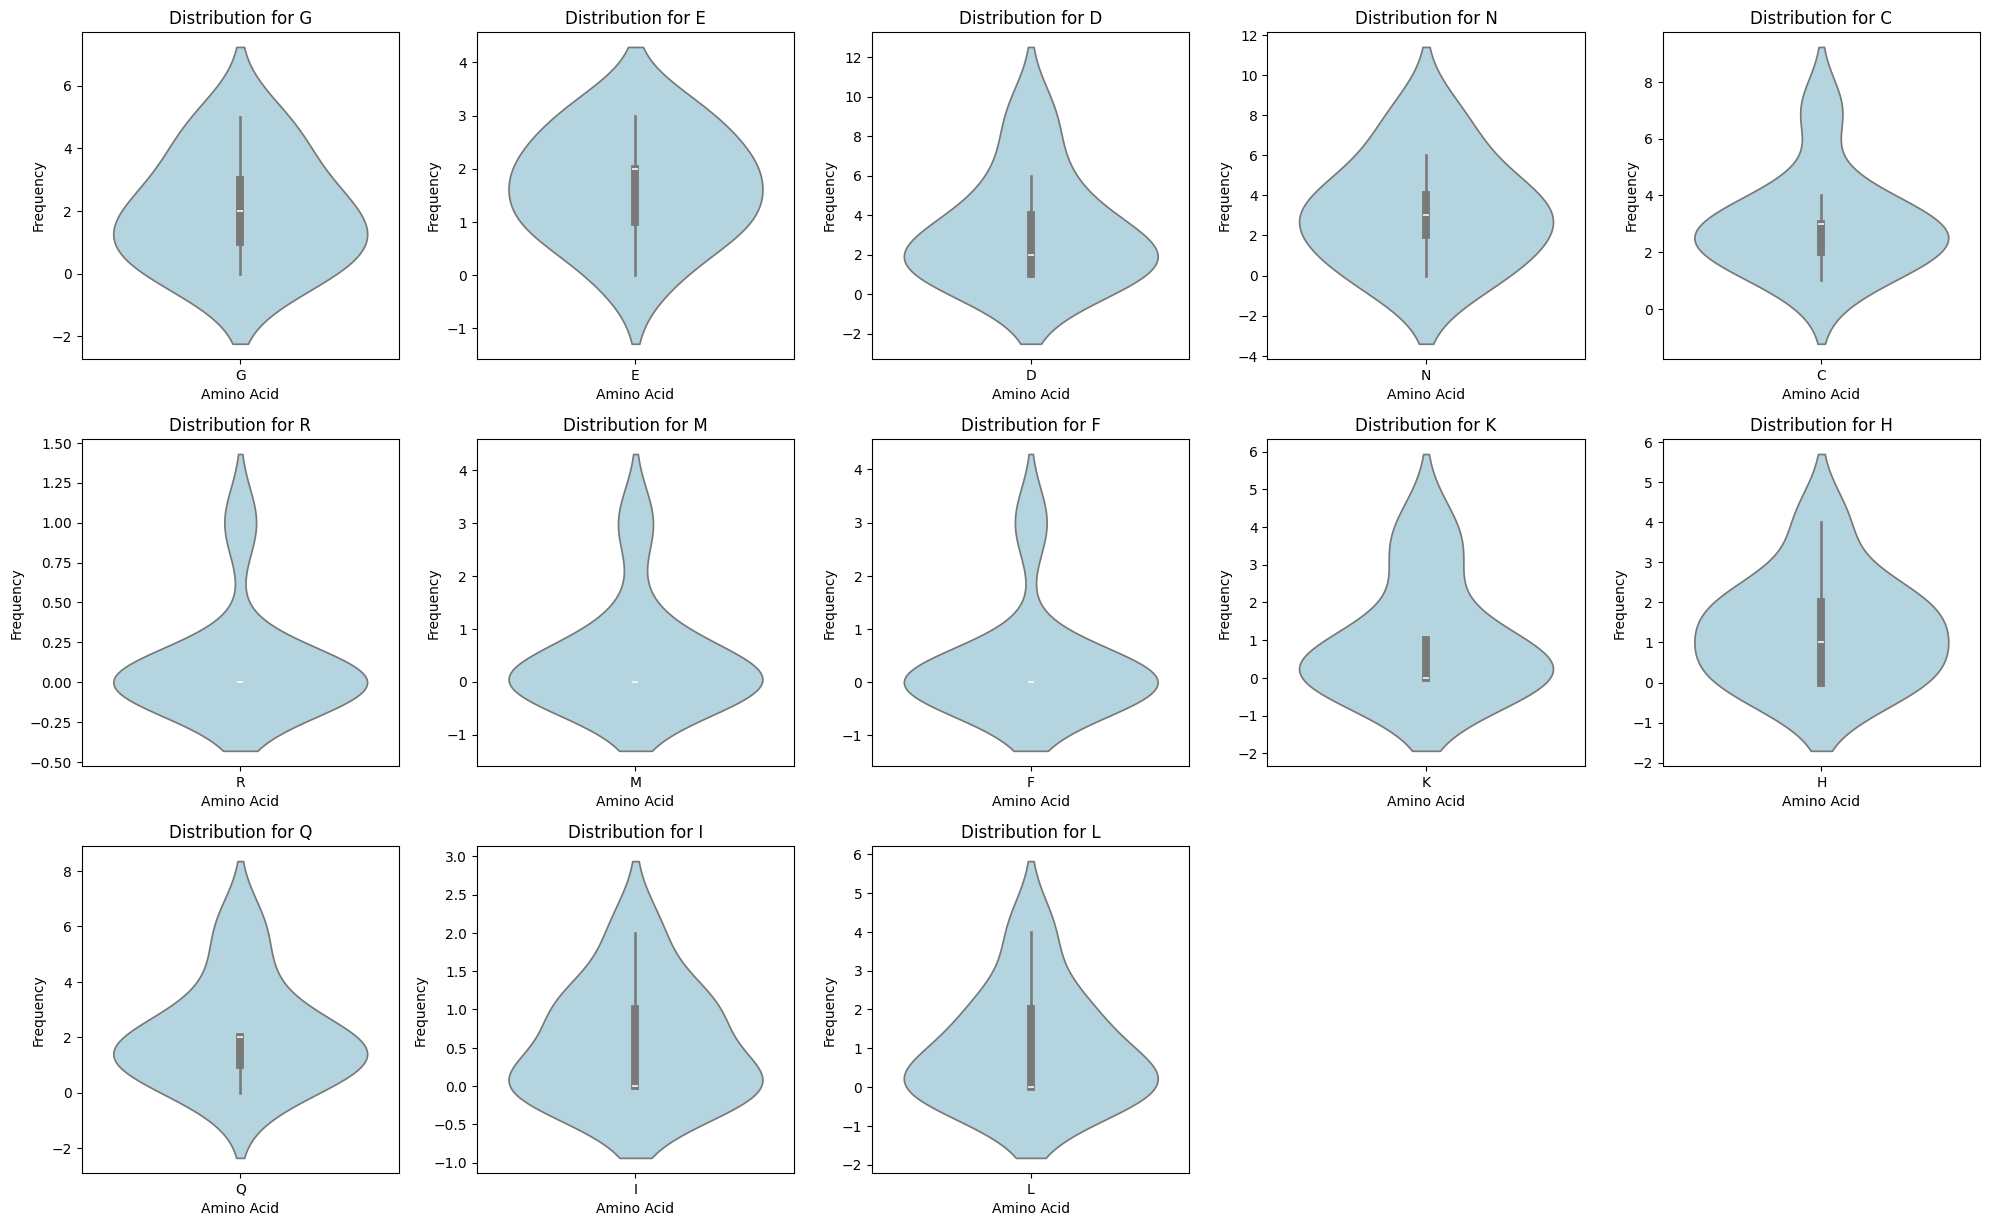

In [ ]:
#figure 3 adera_archive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Your truncated sequences DataFrame
sequences_df = sequences_df_adera

# Count the frequency of each amino acid in each sequence
# Count the frequency of each amino acid in each sequence

letter_distribution = [Counter(sequence) for sequence in sequences_df['Sequence']]

# Convert the list of Counters into a DataFrame
letter_distribution_df = pd.DataFrame(letter_distribution).fillna(0).astype(int)

# Melt the DataFrame for seaborn plotting
melted_df = letter_distribution_df.melt(var_name='Amino Acid', value_name='Frequency')

# Set up the matplotlib figure for subplots
fig, axes = plt.subplots(4, 5, figsize=(20, 16))  # Adjust the number of rows/cols as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Get unique amino acids in the data
unique_amino_acids = melted_df['Amino Acid'].unique()

# Plot a violin plot for each amino acid
for i, amino_acid in enumerate(unique_amino_acids):
    sns.violinplot(data=melted_df[melted_df['Amino Acid'] == amino_acid],
                   x='Amino Acid', y='Frequency', ax=axes[i], color='lightblue', legend=False)
    axes[i].set_title(f'Distribution for {amino_acid}')
    axes[i].set_xlabel('Amino Acid')
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for j in range(len(unique_amino_acids), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


<ipython-input-26-0648e7766afd>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_df[combined_df['Amino Acid'] == amino_acid],
<ipython-input-26-0648e7766afd>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_df[combined_df['Amino Acid'] == amino_acid],
<ipython-input-26-0648e7766afd>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_df[combined_df['Amino Acid'] == amino_acid],
<ipython-input-26-0648e7766afd>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wi

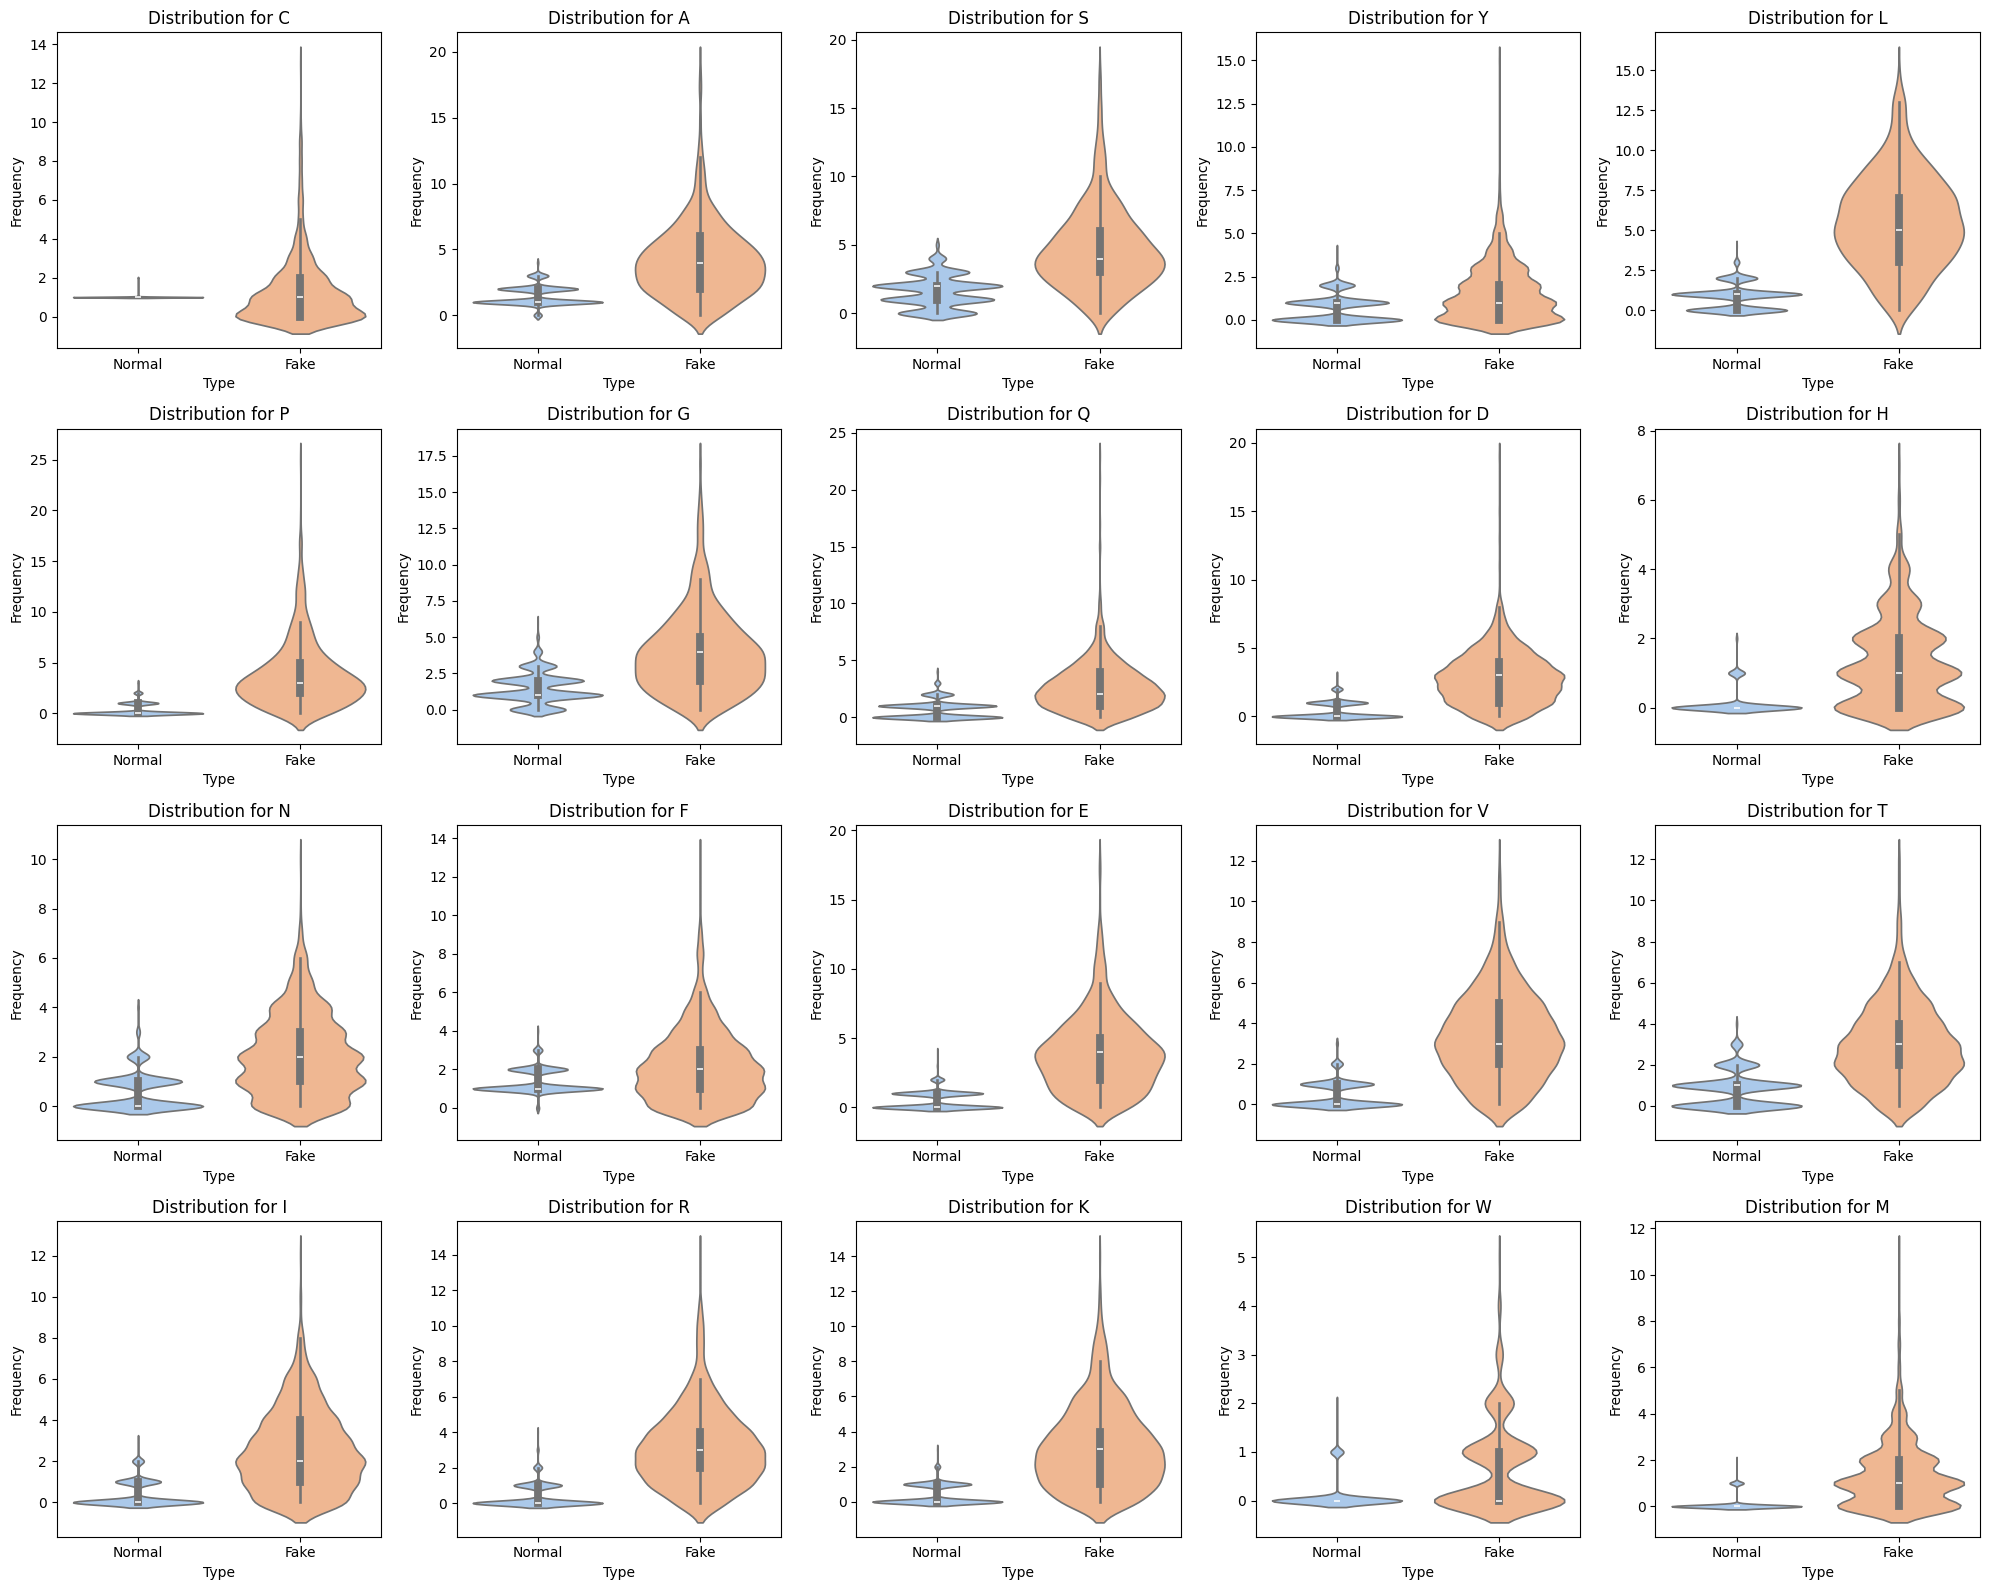

In [ ]:
######figure 3 adera_archive
# Filter data based on 'Gene_adera' values
adera04_tcrb_tca_data = adera04[adera04['Gene_adera'].isin([0, 1])]['CDR3_adera']
adera04_other_data = adera04[adera04['Gene_adera'] == 2]['CDR3_adera']

# Convert sequences to DataFrames
def sequences_to_dataframe(sequences):
    letter_distribution = [Counter(sequence) for sequence in sequences]
    df = pd.DataFrame(letter_distribution).fillna(0).astype(int)
    return df

# Convert both datasets to DataFrames
df_normal = sequences_to_dataframe(adera04_tcrb_tca_data)
df_fake = sequences_to_dataframe(adera04_other_data)

# Melt DataFrames for seaborn plotting
melted_df_normal = df_normal.melt(var_name='Amino Acid', value_name='Frequency')
melted_df_fake = df_fake.melt(var_name='Amino Acid', value_name='Frequency')

# Add a column to distinguish between real and fake
melted_df_normal['Type'] = 'Normal'
melted_df_fake['Type'] = 'Fake'

# Combine DataFrames
combined_df = pd.concat([melted_df_normal, melted_df_fake])

# Set up the matplotlib figure for subplots
fig, axes = plt.subplots(4, 5, figsize=(20, 16))  # Adjust the number of rows/cols as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Get unique amino acids in the data
unique_amino_acids = combined_df['Amino Acid'].unique()

# Plot a violin plot for each amino acid
for i, amino_acid in enumerate(unique_amino_acids):
    sns.violinplot(data=combined_df[combined_df['Amino Acid'] == amino_acid],
                   x='Type', y='Frequency', ax=axes[i], color='lightblue', palette='pastel', legend=False)
    axes[i].set_title(f'Distribution for {amino_acid}')
    axes[i].set_xlabel('Type')
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for j in range(len(unique_amino_acids), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


<ipython-input-28-f7769ff352cb>:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  seq_letters = [class_Adera_reversed.get(int(val), 'X') for val in seq]
<ipython-input-28-f7769ff352cb>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_df[combined_df['Amino Acid'] == amino_acid],
<ipython-input-28-f7769ff352cb>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_df[combined_df['Amino Acid'] == amino_acid],
<ipython-input-28-f7769ff352cb>:84: FutureWarning: 

Passing `palette` without a

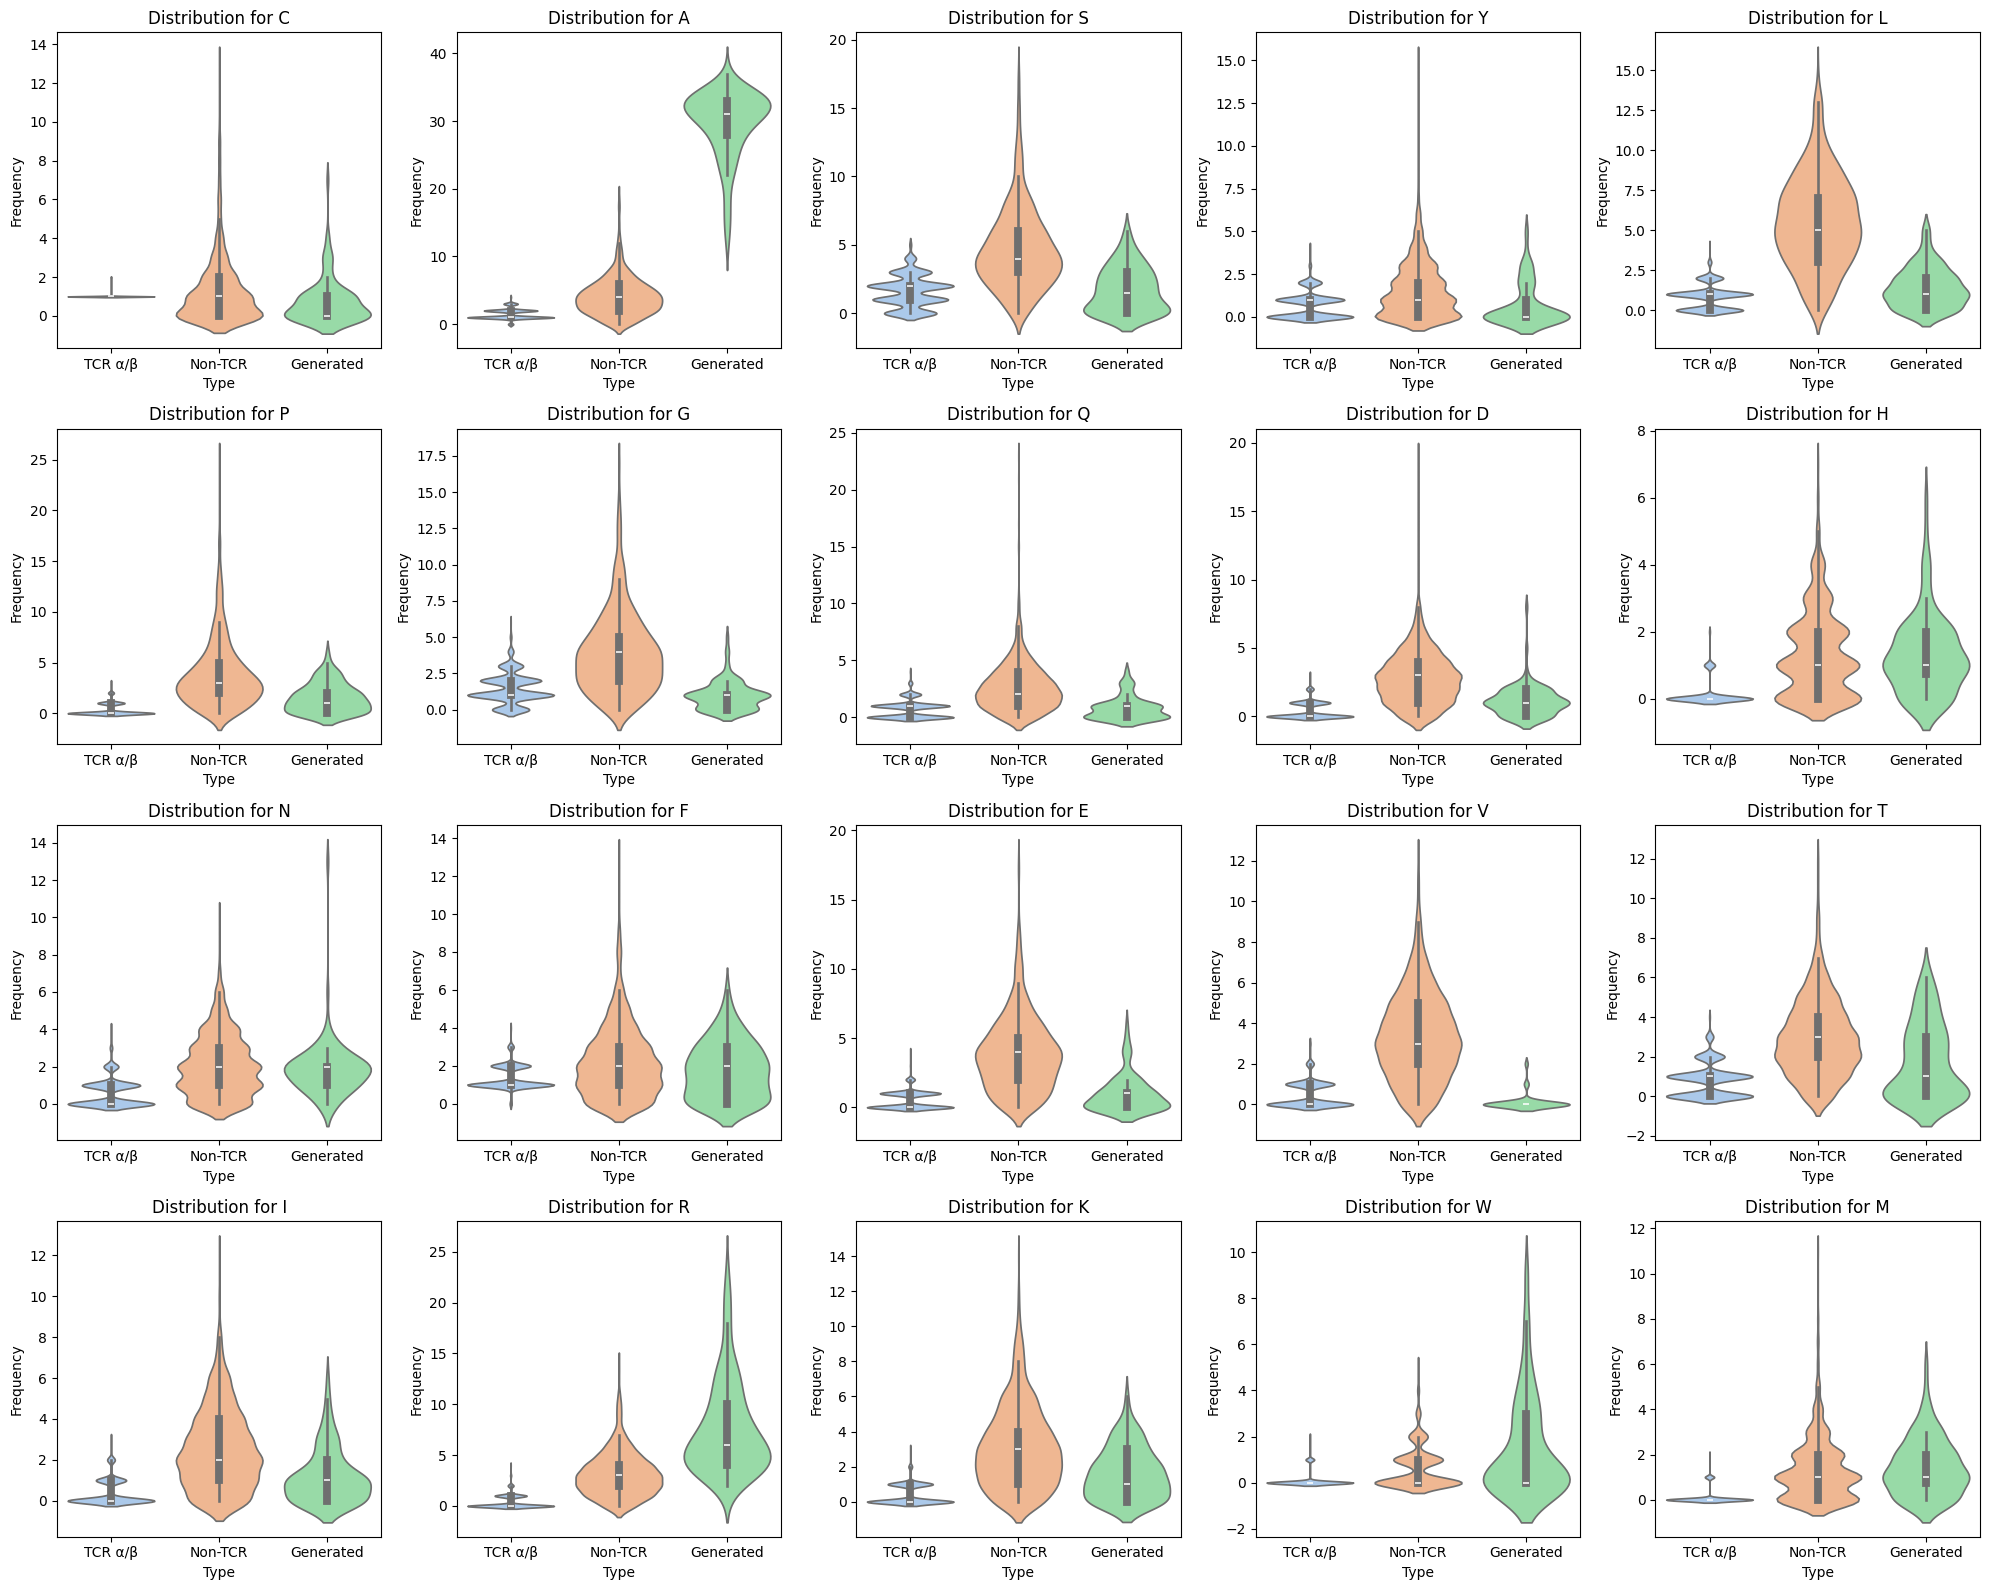

In [ ]:
###figure 3_Adera__archives
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Define class mapping for amino acids
class_Adera = {"A": 11, "R": 12, "N": 13, "D": 14, "C": 15, "E": 16, "Q": 17, "G": 18, "H": 19, "I": 20,
               "L": 21, "K": 22, "M": 23, "F": 24, "P": 25, "S": 26, "T": 27, "W": 28, "Y": 29, "V": 30}

class_Adera_reversed = {v: k for k, v in class_Adera.items()}

def sequences_to_dataframe(sequences):
    # Count the frequency of each amino acid in each sequence
    letter_distribution = [Counter(sequence) for sequence in sequences]
    # Convert the list of Counters into a DataFrame
    df = pd.DataFrame(letter_distribution).fillna(0).astype(int)
    return df

# Assuming 'adera04' contains 'CDR3_adera' and 'Gene_adera' columns
# Load your actual data
# adera04 = pd.read_csv('path_to_your_data.csv')

# Filter data based on 'Gene_adera' values
adera04_tcrb_tca_data = adera04[adera04['Gene_adera'].isin([0, 1])]['CDR3_adera']
adera04_other_data = adera04[adera04['Gene_adera'] == 2]['CDR3_adera']

# Convert both datasets to DataFrames
df_normal = sequences_to_dataframe(adera04_tcrb_tca_data)
df_fake = sequences_to_dataframe(adera04_other_data)

# Prepare generated sequences
num_sequences = 100
latent_dim = 20  # Make sure this matches your actual latent dimension

# Generate noise and transform it
noise = np.random.uniform(0, 1, (num_sequences, latent_dim))  # Generate uniform noise between 0 and 1
noise_transformed_adera = noise * (30 - 11) + 11  # Transform the noise to the range 11 to 30

# Generate sequences
generated_seqs_adera = generator_adera.predict(noise_transformed_adera)

# Rescale to the range 11 to 30
min_val, max_val = generated_seqs_adera.min(), generated_seqs_adera.max()
scaled_seqs_adera = 11 + (generated_seqs_adera - min_val) * (30 - 11) / (max_val - min_val)

# Round to nearest integers and clip to ensure values are within the range [11, 30]
generated_seqs_adera = np.clip(np.round(scaled_seqs_adera).astype(int), 11, 30)

# Convert generated sequences to letters
generated_seqs_letters = []
for seq in generated_seqs_adera:
    # Ensure each value is a scalar, not an ndarray
    seq_letters = [class_Adera_reversed.get(int(val), 'X') for val in seq]
    generated_seqs_letters.append(seq_letters)

# Convert generated sequences to DataFrame
df_generated = sequences_to_dataframe([''.join(seq) for seq in generated_seqs_letters])

# Melt DataFrames for seaborn plotting
melted_df_normal = df_normal.melt(var_name='Amino Acid', value_name='Frequency')
melted_df_fake = df_fake.melt(var_name='Amino Acid', value_name='Frequency')
melted_df_generated = df_generated.melt(var_name='Amino Acid', value_name='Frequency')

# Add a column to distinguish between real, fake, and generated
melted_df_normal['Type'] = 'TCR α/β'
melted_df_fake['Type'] = 'Non-TCR'
melted_df_generated['Type'] = 'Generated'

# Combine DataFrames
combined_df = pd.concat([melted_df_normal, melted_df_fake, melted_df_generated])

# Set up the matplotlib figure for subplots
fig, axes = plt.subplots(4, 5, figsize=(20, 16))  # Adjust the number of rows/cols as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Get unique amino acids in the data
unique_amino_acids = combined_df['Amino Acid'].unique()

# Plot a violin plot for each amino acid
for i, amino_acid in enumerate(unique_amino_acids):
    sns.violinplot(data=combined_df[combined_df['Amino Acid'] == amino_acid],
                   x='Type', y='Frequency', ax=axes[i], color='lightblue', palette='pastel', legend=False)
    axes[i].set_title(f'Distribution for {amino_acid}')
    axes[i].set_xlabel('Type')
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for j in range(len(unique_amino_acids), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


<ipython-input-29-d4159437d58a>:56: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  seq_letters = [class_Adera_reversed.get(int(val), 'X') for val in seq]
<ipython-input-29-d4159437d58a>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_df[combined_df['Amino Acid'] == amino_acid],
<ipython-input-29-d4159437d58a>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_df[combined_df['Amino Acid'] == amino_acid],
<ipython-input-29-d4159437d58a>:86: FutureWarning: 

Passing `palette` without a

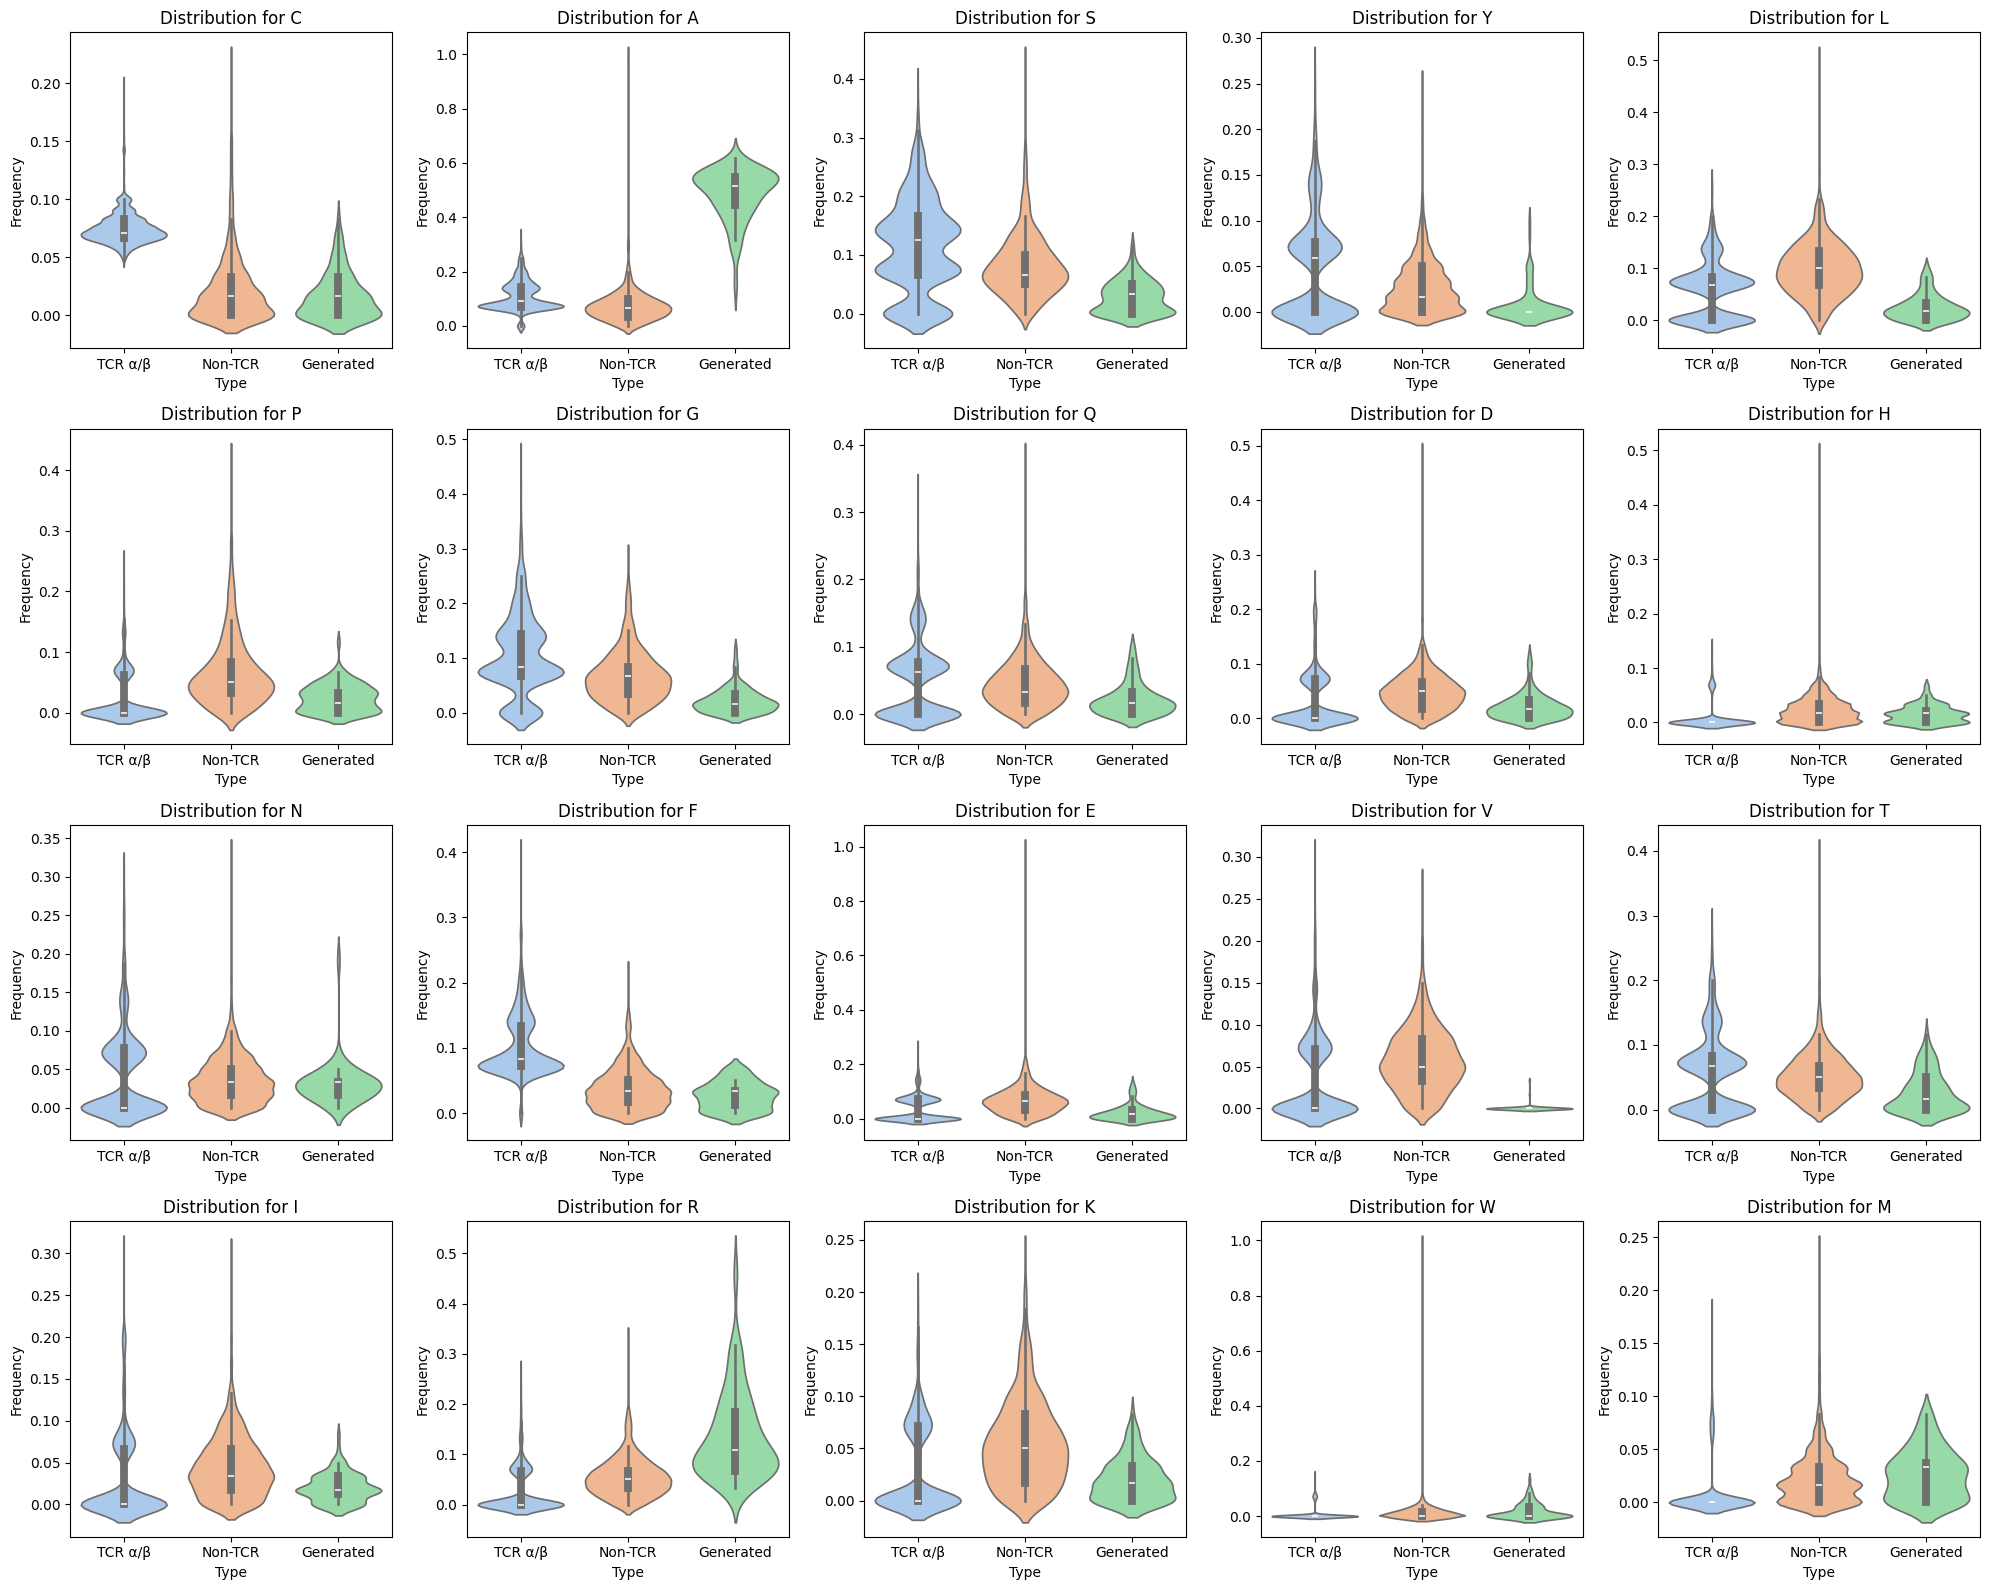

In [ ]:

####figure 3_Adera_
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Define class mapping for amino acids
class_Adera = {"A": 11, "R": 12, "N": 13, "D": 14, "C": 15, "E": 16, "Q": 17, "G": 18, "H": 19, "I": 20,
               "L": 21, "K": 22, "M": 23, "F": 24, "P": 25, "S": 26, "T": 27, "W": 28, "Y": 29, "V": 30}

class_Adera_reversed = {v: k for k, v in class_Adera.items()}

def sequences_to_dataframe(sequences):
    # Count the frequency of each amino acid in each sequence
    letter_distribution = [Counter(sequence) for sequence in sequences]
    # Convert the list of Counters into a DataFrame
    df = pd.DataFrame(letter_distribution).fillna(0).astype(int)
    # Normalize the frequency by dividing by the length of the sequence
    df_normalized = df.div(df.sum(axis=1), axis=0)
    return df_normalized

# Assuming 'adera04' contains 'CDR3_adera' and 'Gene_adera' columns
# Load your actual data
# adera04 = pd.read_csv('path_to_your_data.csv')

# Filter data based on 'Gene_adera' values
adera04_tcrb_tca_data = adera04[adera04['Gene_adera'].isin([0, 1])]['CDR3_adera']
adera04_other_data = adera04[adera04['Gene_adera'] == 2]['CDR3_adera']

# Convert both datasets to DataFrames
df_normal = sequences_to_dataframe(adera04_tcrb_tca_data)
df_fake = sequences_to_dataframe(adera04_other_data)

# Prepare generated sequences
num_sequences = 100
latent_dim = 20  # Make sure this matches your actual latent dimension

# Generate noise and transform it
noise = np.random.uniform(0, 1, (num_sequences, latent_dim))  # Generate uniform noise between 0 and 1
noise_transformed_adera = noise * (30 - 11) + 11  # Transform the noise to the range 11 to 30

# Generate sequences
generated_seqs_adera = generator_adera.predict(noise_transformed_adera)

# Rescale to the range 11 to 30
min_val, max_val = generated_seqs_adera.min(), generated_seqs_adera.max()
scaled_seqs_adera = 11 + (generated_seqs_adera - min_val) * (30 - 11) / (max_val - min_val)

# Round to nearest integers and clip to ensure values are within the range [11, 30]
generated_seqs_adera = np.clip(np.round(scaled_seqs_adera).astype(int), 11, 30)

# Convert generated sequences to letters
generated_seqs_letters = []
for seq in generated_seqs_adera:
    # Ensure each value is a scalar, not an ndarray
    seq_letters = [class_Adera_reversed.get(int(val), 'X') for val in seq]
    generated_seqs_letters.append(seq_letters)

# Convert generated sequences to DataFrame
df_generated = sequences_to_dataframe([''.join(seq) for seq in generated_seqs_letters])

# Melt DataFrames for seaborn plotting
melted_df_normal = df_normal.melt(var_name='Amino Acid', value_name='Frequency')
melted_df_fake = df_fake.melt(var_name='Amino Acid', value_name='Frequency')
melted_df_generated = df_generated.melt(var_name='Amino Acid', value_name='Frequency')

# Add a column to distinguish between real, fake, and generated
melted_df_normal['Type'] = 'TCR α/β'
melted_df_fake['Type'] = 'Non-TCR'
melted_df_generated['Type'] = 'Generated'

# Combine DataFrames
combined_df = pd.concat([melted_df_normal, melted_df_fake, melted_df_generated])

# Set up the matplotlib figure for subplots
fig, axes = plt.subplots(4, 5, figsize=(20, 16))  # Adjust the number of rows/cols as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Get unique amino acids in the data
unique_amino_acids = combined_df['Amino Acid'].unique()

# Plot a violin plot for each amino acid
for i, amino_acid in enumerate(unique_amino_acids):
    sns.violinplot(data=combined_df[combined_df['Amino Acid'] == amino_acid],
                   x='Type', y='Frequency', ax=axes[i], color='lightblue', palette='pastel', legend=False)
    axes[i].set_title(f'Distribution for {amino_acid}')
    axes[i].set_xlabel('Type')
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for j in range(len(unique_amino_acids), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


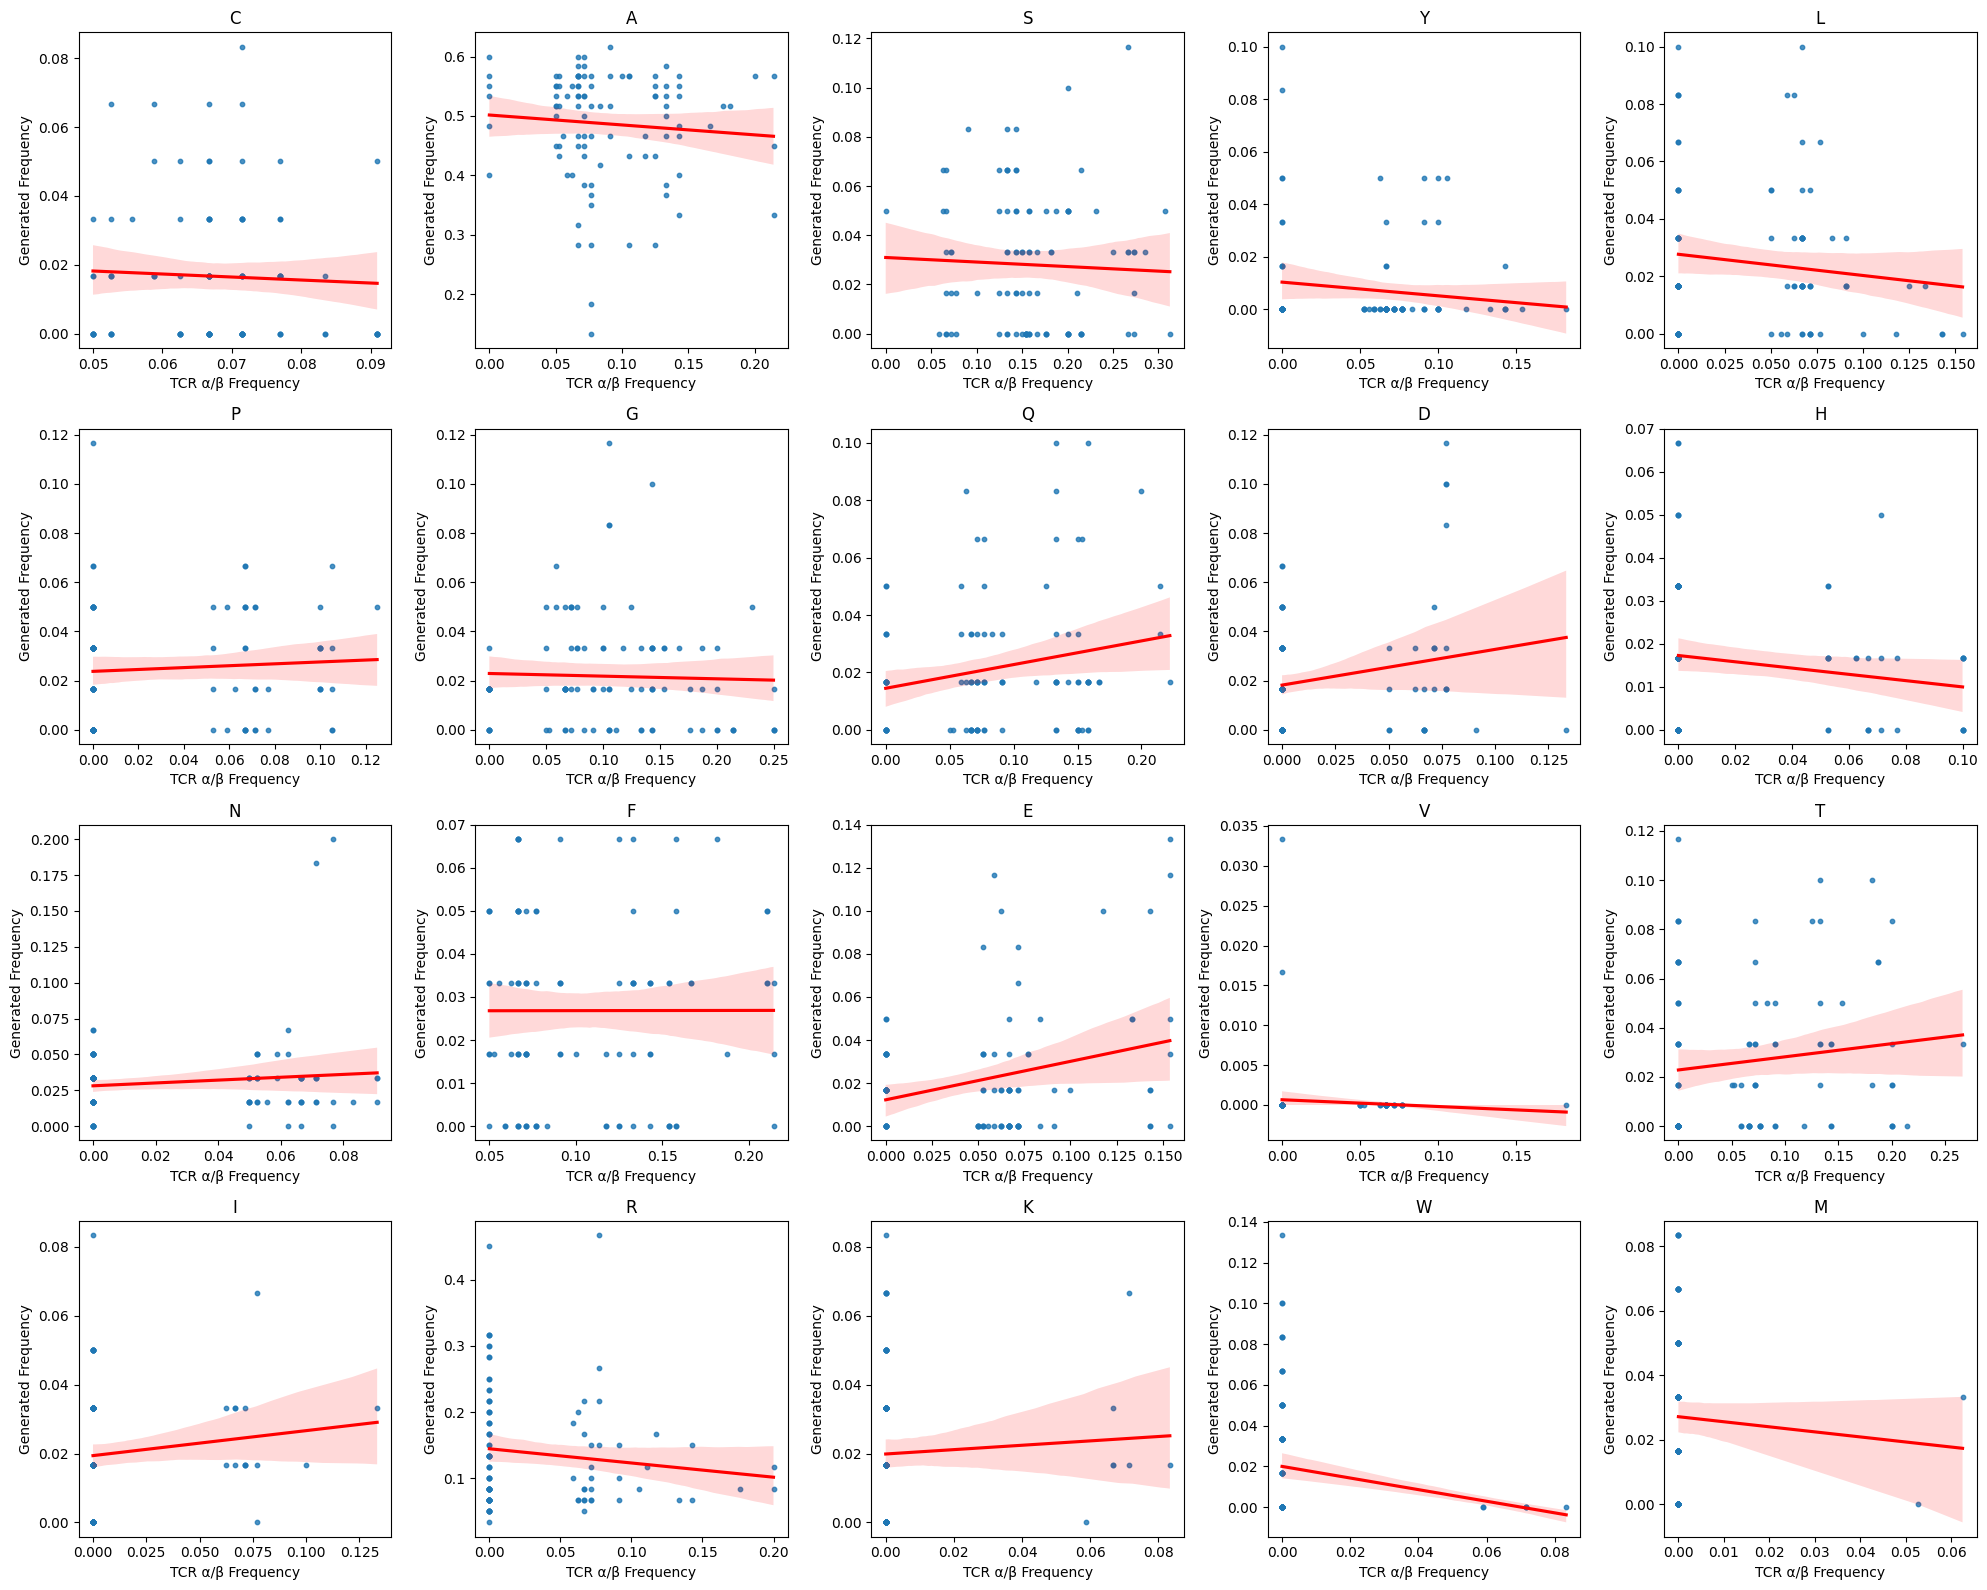

In [ ]:
#Figure4 : Pearson
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the figure
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))  # Adjust rows and columns as needed

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop over each amino acid and create a scatter plot with a regression line
for i, amino_acid in enumerate(df_normal.columns):
    # Extract the distribution of the amino acid in TCR α/β and Generated sequences
    tcr_distribution = df_normal[amino_acid]
    generated_distribution = df_generated[amino_acid]

    # Match lengths by trimming the larger dataset
    min_length = min(len(tcr_distribution), len(generated_distribution))
    tcr_distribution = tcr_distribution.iloc[:min_length]
    generated_distribution = generated_distribution.iloc[:min_length]

    # Plot scatter plot with regression line
    sns.regplot(x=tcr_distribution, y=generated_distribution, ax=axes[i],
                line_kws={"color": "red"}, scatter_kws={'s':10})

    # Set title and labels
    axes[i].set_title(f'{amino_acid}')
    axes[i].set_xlabel('TCR α/β Frequency')
    axes[i].set_ylabel('Generated Frequency')

# Remove any empty subplots (in case we have less than 20 amino acids)
for j in range(len(df_normal.columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Load data
adera04 = pd.read_csv("adera_tcr_input_mkr5b.csv", sep=",", header=0)

# Data preprocessing
adera_dimension_data = 3000  # Number of rows for TCR sequences
my_cols = 60  # Maximum number of amino acids per sequence

# Prepare the input matrix
input_results_adera = np.zeros((adera_dimension_data, my_cols))

# Mapping function for amino acids (assuming `class_Adera` is predefined)
class_Adera = {aa: idx for idx, aa in enumerate("ACDEFGHIKLMNPQRSTVWY")}  # Example mapping

for i in range(adera_dimension_data):
    adera_outputstr = adera04.iloc[i, 0]  # Extract sequence
    for j in range(len(adera_outputstr)):
        kr1 = class_Adera.get(adera_outputstr[j], 0)  # Default to 0 if amino acid not found
        input_results_adera[i, j] = kr1





input_results_adera_generated = np.zeros((len(sequences_df_adera), 20))

# Mapping function for amino acids
class_Adera = {aa: idx for idx, aa in enumerate("ACDEFGHIKLMNPQRSTVWY")}
for i in range(len(sequences_df_adera)):
    adera_outputstr_gnerated = sequences_df_adera.iloc[i, 0]  # Extract sequence
    for j in range(len(adera_outputstr_gnerated)):
        kr1_generated = class_Adera.get(adera_outputstr_gnerated[j], 0)  # Default to 0 if amino acid not found
        input_results_adera_generated[i, j] = kr1_generated

# Output labels (assuming labels are in the second column)
output_results_adera = adera04.iloc[:adera_dimension_data, 1].values


from sklearn.preprocessing import RobustScaler

# Robust Scaler Normalization
scaler = RobustScaler()
input_results_normalized_adera_real = scaler.fit_transform(input_results_adera)[0:1000]
input_results_normalized_adera_fake = scaler.fit_transform(input_results_adera)[2000:3000]
input_results_normalized_adera_generated= scaler.fit_transform( input_results_adera_generated)

input_results_normalized
tsne1_adera = TSNE(n_components=2, perplexity=30, random_state=42)
tsne3_adera = TSNE(n_components=2, perplexity=30, random_state=42)
tsne1_adera
tsne1_result_adera_real = tsne1_adera.fit_transform(input_results_normalized_adera_real)
tsne1_result_adera_fake = tsne1_adera.fit_transform(input_results_normalized_adera_fake)
tsne1_result_adera_generated = tsne3_adera.fit_transform(input_results_normalized_adera_generated)

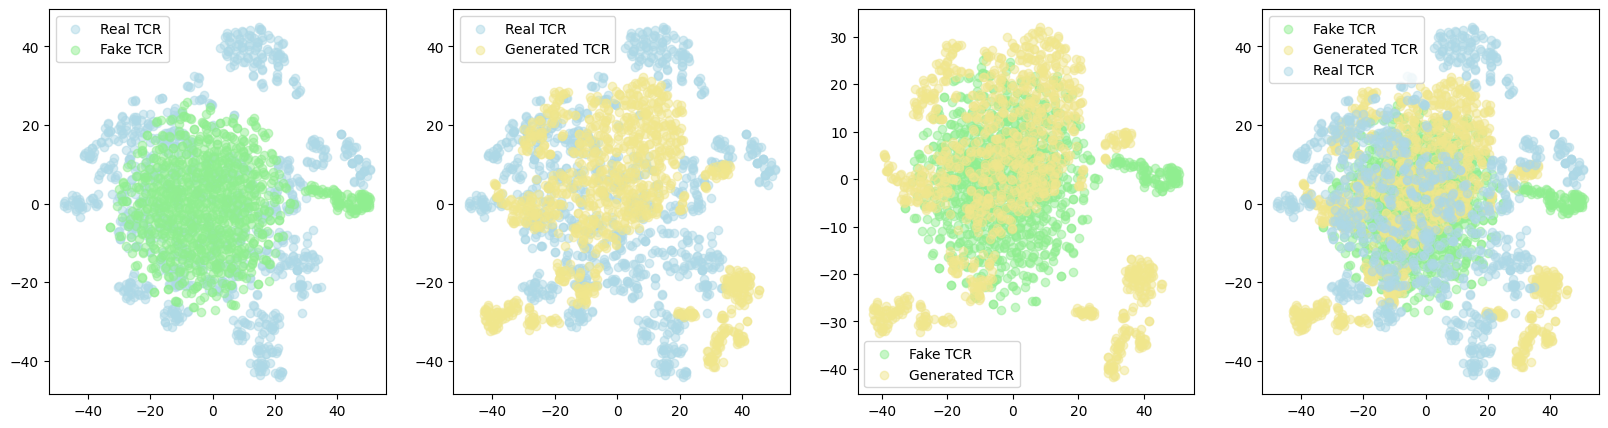

In [ ]:
import matplotlib.pyplot as plt

# Define colors for each category
real_color = 'lightblue'
fake_color = 'lightgreen'     # Light green for Fake TCRs
generated_color = '#F0E68C'  # Light yellow for Generated TCRs
plt.figure(figsize=(20, 5))

# First subplot: Real vs. Fake TCRs
plt.subplot(141)
plt.scatter(tsne1_result_adera_real[:, 0], tsne1_result_adera_real[:, 1], label='Real TCR', color=real_color, alpha=0.5)
plt.scatter(tsne1_result_adera_fake[:, 0], tsne1_result_adera_fake[:, 1], label='Fake TCR', color=fake_color, alpha=0.5)
plt.legend()

# Second subplot: Real vs. Generated TCRs
plt.subplot(142)
plt.scatter(tsne1_result_adera_real[:, 0], tsne1_result_adera_real[:, 1], label='Real TCR', color=real_color, alpha=0.5)
plt.scatter(tsne1_result_adera_generated[:, 0], tsne1_result_adera_generated[:, 1], label='Generated TCR', color=generated_color, alpha=0.5)
plt.legend()

# Third subplot: Fake vs. Generated TCRs
plt.subplot(143)
plt.scatter(tsne1_result_adera_fake[:, 0], tsne1_result_adera_fake[:, 1], label='Fake TCR', color=fake_color, alpha=0.5)
plt.scatter(tsne1_result_adera_generated[:, 0], tsne1_result_adera_generated[:, 1], label='Generated TCR', color=generated_color, alpha=0.5)
plt.legend()



plt.subplot(144)
plt.scatter(tsne1_result_adera_fake[:, 0], tsne1_result_adera_fake[:, 1], label='Fake TCR', color=fake_color, alpha=0.5)
plt.scatter(tsne1_result_adera_generated[:, 0], tsne1_result_adera_generated[:, 1], label='Generated TCR', color=generated_color, alpha=0.5)
plt.scatter(tsne1_result_adera_real[:, 0], tsne1_result_adera_real[:, 1], label='Real TCR', color=real_color, alpha=0.5)
plt.legend()

plt.show()

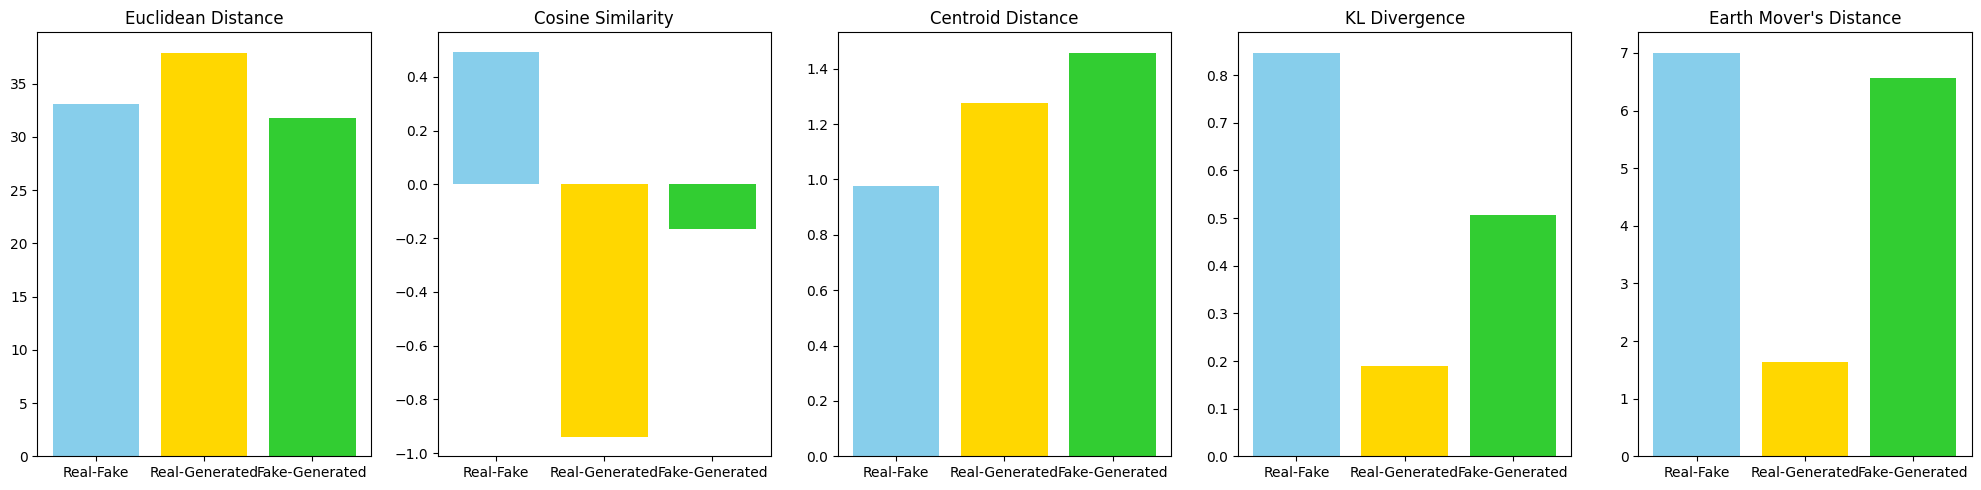

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist, euclidean
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import entropy
from scipy.stats import wasserstein_distance

# Assuming tsne1_result_adera_real, tsne1_result_adera_fake, tsne1_result_adera_generated are the t-SNE results

# 1. Euclidean Distance
euclidean_real_fake = cdist(tsne1_result_adera_real, tsne1_result_adera_fake, metric='euclidean').mean()
euclidean_real_generated = cdist(tsne1_result_adera_real, tsne1_result_adera_generated, metric='euclidean').mean()
euclidean_fake_generated = cdist(tsne1_result_adera_fake, tsne1_result_adera_generated, metric='euclidean').mean()

# 2. Cosine Similarity
cosine_real_fake = cosine_similarity(tsne1_result_adera_real.mean(axis=0).reshape(1, -1),
                                     tsne1_result_adera_fake.mean(axis=0).reshape(1, -1)).flatten()[0]
cosine_real_generated = cosine_similarity(tsne1_result_adera_real.mean(axis=0).reshape(1, -1),
                                          tsne1_result_adera_generated.mean(axis=0).reshape(1, -1)).flatten()[0]
cosine_fake_generated = cosine_similarity(tsne1_result_adera_fake.mean(axis=0).reshape(1, -1),
                                          tsne1_result_adera_generated.mean(axis=0).reshape(1, -1)).flatten()[0]

# 3. Centroid Distance (Euclidean between centroids)
centroid_real = tsne1_result_adera_real.mean(axis=0)
centroid_fake = tsne1_result_adera_fake.mean(axis=0)
centroid_generated = tsne1_result_adera_generated.mean(axis=0)

centroid_real_fake = euclidean(centroid_real, centroid_fake)
centroid_real_generated = euclidean(centroid_real, centroid_generated)
centroid_fake_generated = euclidean(centroid_fake, centroid_generated)

# 4. KL Divergence (Approximation by histogram method)
def kl_divergence(p, q):
    p_hist, _ = np.histogram(p, bins=100, density=True)
    q_hist, _ = np.histogram(q, bins=100, density=True)
    return entropy(p_hist + 1e-10, q_hist + 1e-10)

kl_real_fake = kl_divergence(tsne1_result_adera_real.flatten(), tsne1_result_adera_fake.flatten())
kl_real_generated = kl_divergence(tsne1_result_adera_real.flatten(), tsne1_result_adera_generated.flatten())
kl_fake_generated = kl_divergence(tsne1_result_adera_fake.flatten(), tsne1_result_adera_generated.flatten())

# 5. Earth Mover's Distance (Wasserstein Distance)
emd_real_fake = wasserstein_distance(tsne1_result_adera_real.flatten(), tsne1_result_adera_fake.flatten())
emd_real_generated = wasserstein_distance(tsne1_result_adera_real.flatten(), tsne1_result_adera_generated.flatten())
emd_fake_generated = wasserstein_distance(tsne1_result_adera_fake.flatten(), tsne1_result_adera_generated.flatten())

# Plotting the results
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
metrics = ['Euclidean Distance', 'Cosine Similarity', 'Centroid Distance', 'KL Divergence', 'Earth Mover\'s Distance']
real_fake_values = [euclidean_real_fake, cosine_real_fake, centroid_real_fake, kl_real_fake, emd_real_fake]
real_generated_values = [euclidean_real_generated, cosine_real_generated, centroid_real_generated, kl_real_generated, emd_real_generated]
fake_generated_values = [euclidean_fake_generated, cosine_fake_generated, centroid_fake_generated, kl_fake_generated, emd_fake_generated]

# Labels for subplots
for i, ax in enumerate(axes):
    ax.bar(['Real-Fake', 'Real-Generated', 'Fake-Generated'],
           [real_fake_values[i], real_generated_values[i], fake_generated_values[i]],
           color=['#87CEEB', '#FFD700', '#32CD32'])
    ax.set_title(metrics[i])

plt.tight_layout()
plt.show()


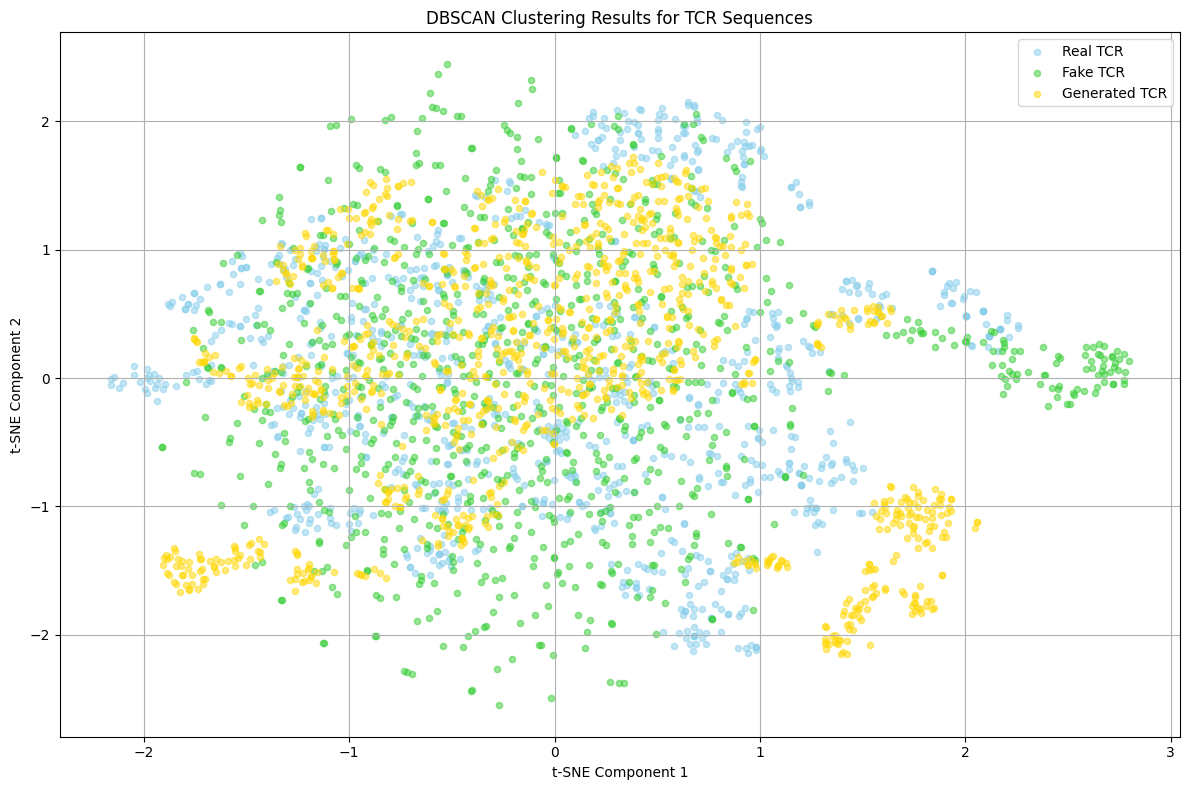

In [ ]:
# DBSCAN Clustering not very clear not included in the manuscript
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Assuming tsne1_result_adera_real, tsne1_result_adera_fake, tsne1_result_adera_generated are the t-SNE results

# Normalize the t-SNE results for better clustering performance
scaler = StandardScaler()
tsne_real_scaled = scaler.fit_transform(tsne1_result_adera_real)
tsne_fake_scaled = scaler.fit_transform(tsne1_result_adera_fake)
tsne_generated_scaled = scaler.fit_transform(tsne1_result_adera_generated)

# DBSCAN Clustering
def dbscan_clustering(tsne_data):
    dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
    labels = dbscan.fit_predict(tsne_data)
    return labels

dbscan_real_labels = dbscan_clustering(tsne_real_scaled)
dbscan_fake_labels = dbscan_clustering(tsne_fake_scaled)
dbscan_generated_labels = dbscan_clustering(tsne_generated_scaled)

# Plotting the DBSCAN results in one figure with distinct colors
plt.figure(figsize=(12, 8))

# Define colors for each dataset
color_real = '#87CEEB'      # Sky Blue
color_fake = '#32CD32'      # Lime Green
color_generated = '#FFD700' # Gold

# Plot Real TCR sequences
plt.scatter(tsne_real_scaled[:, 0], tsne_real_scaled[:, 1], c=color_real, label='Real TCR', alpha=0.5, s=20)

# Plot Fake TCR sequences
plt.scatter(tsne_fake_scaled[:, 0], tsne_fake_scaled[:, 1], c=color_fake, label='Fake TCR', alpha=0.5, s=20)

# Plot Generated TCR sequences
plt.scatter(tsne_generated_scaled[:, 0], tsne_generated_scaled[:, 1], c=color_generated, label='Generated TCR', alpha=0.5, s=20)

# Add labels and legend
plt.title('DBSCAN Clustering Results for TCR Sequences')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


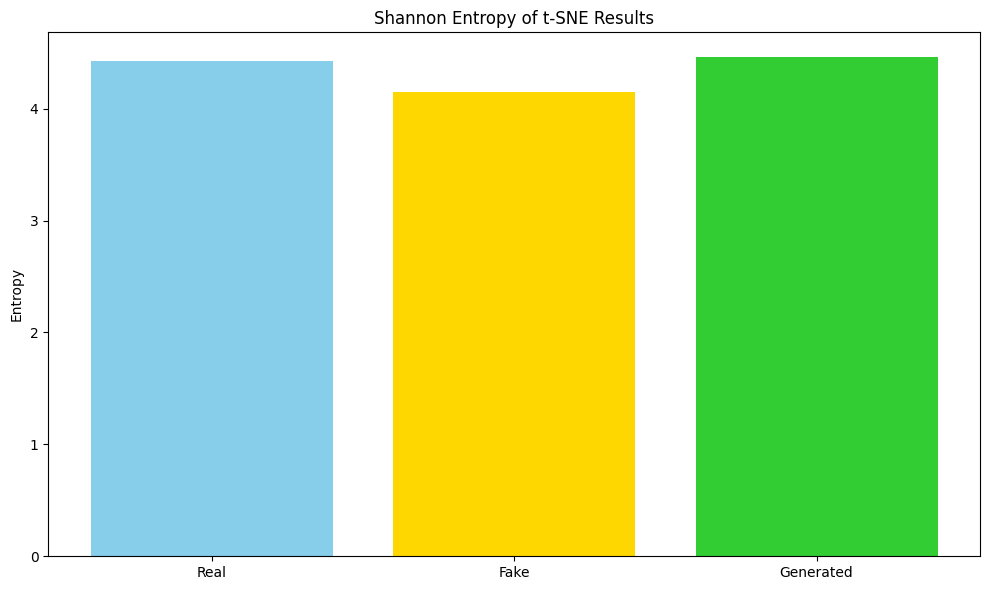

Shannon Entropy (Real): 4.4225
Shannon Entropy (Fake): 4.1482
Shannon Entropy (Generated): 4.4585


In [ ]:
# Function to compute Shannon entropy
def compute_shannon_entropy(data):
    """Compute Shannon entropy of the data."""
    hist, _ = np.histogram(data, bins=100, density=True)
    hist = hist[hist > 0]  # Filter out zeros
    return entropy(hist)

# Compute Shannon entropy for t-SNE results
entropy_real = compute_shannon_entropy(tsne1_result_adera_real.flatten())
entropy_fake = compute_shannon_entropy(tsne1_result_adera_fake.flatten())
entropy_generated = compute_shannon_entropy(tsne1_result_adera_generated.flatten())

# Plot Shannon entropy
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(['Real', 'Fake', 'Generated'], [entropy_real, entropy_fake, entropy_generated], color=['#87CEEB', '#FFD700', '#32CD32'])
ax.set_title('Shannon Entropy of t-SNE Results')
ax.set_ylabel('Entropy')
plt.tight_layout()
plt.show()

print(f"Shannon Entropy (Real): {entropy_real:.4f}")
print(f"Shannon Entropy (Fake): {entropy_fake:.4f}")
print(f"Shannon Entropy (Generated): {entropy_generated:.4f}")

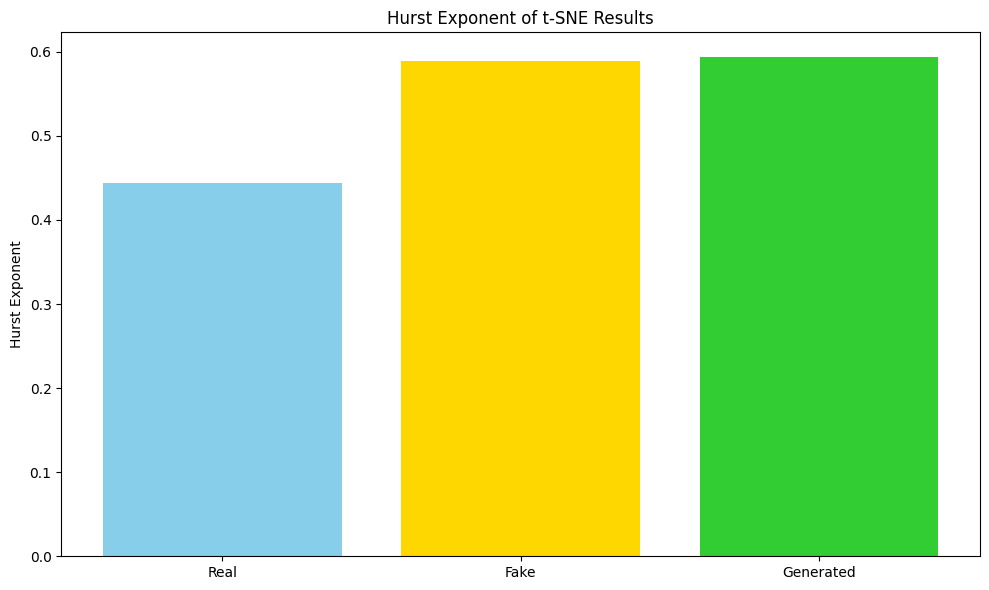

Hurst Exponent (Real): 0.4442
Hurst Exponent (Fake): 0.5892
Hurst Exponent (Generated): 0.5935


In [ ]:
# Install necessary packages if not already installed
!pip install hurst numpy matplotlib

import numpy as np
import matplotlib.pyplot as plt
from hurst import compute_Hc

def preprocess_data(data):
    """Flatten and ensure data is a numpy array."""
    return np.asarray(data).flatten()

def compute_hurst_exponent(data):
    """Compute Hurst exponent of the data."""
    data = preprocess_data(data)
    try:
        H, c, _ = compute_Hc(data, kind='price', simplified=True)
        return H
    except FloatingPointError as e:
        print(f"Error computing Hurst exponent: {e}")
        return np.nan  # or a specific value indicating an error

# Assuming tsne1_result_adera_real, tsne1_result_adera_fake, tsne1_result_adera_generated are the t-SNE results

# Compute Hurst exponent for t-SNE results
hurst_real = compute_hurst_exponent(input_results_normalized_adera_real)
hurst_fake = compute_hurst_exponent(input_results_normalized_adera_fake)
hurst_generated = compute_hurst_exponent(tsne1_result_adera_generated)

# Plot Hurst exponent
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(['Real', 'Fake', 'Generated'], [hurst_real, hurst_fake, hurst_generated], color=['#87CEEB', '#FFD700', '#32CD32'])
ax.set_title('Hurst Exponent of inputs')
ax.set_ylabel('Hurst Exponent')
plt.tight_layout()
plt.show()

print(f"Hurst Exponent (Real): {hurst_real:.4f}")
print(f"Hurst Exponent (Fake): {hurst_fake:.4f}")
print(f"Hurst Exponent (Generated): {hurst_generated:.4f}")



ERROR: Could not find a version that satisfies the requirement gini-coefficient (from versions: none)
ERROR: No matching distribution found for gini-coefficient


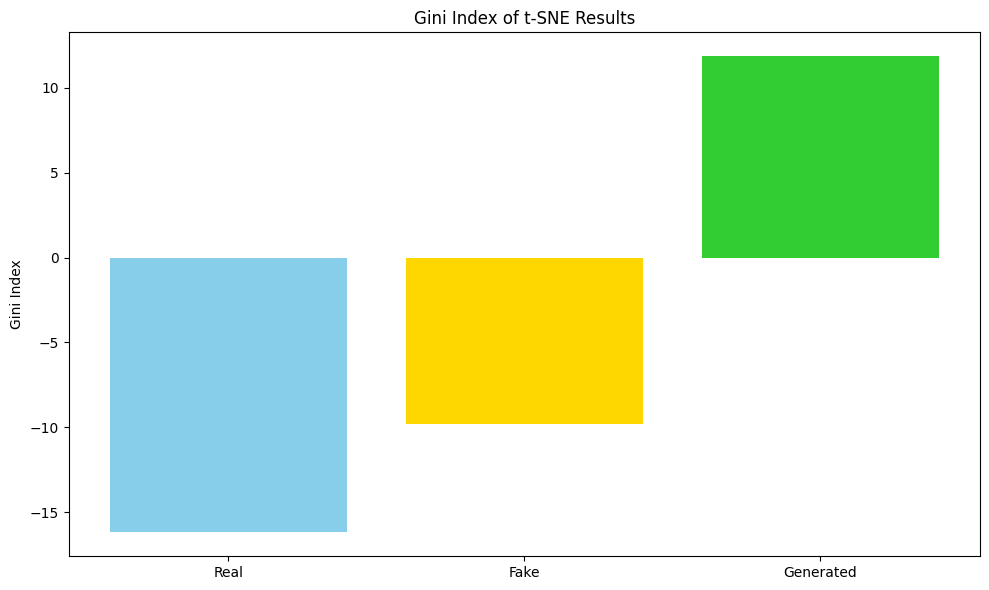

Gini Index (Real): -16.1822
Gini Index (Fake): -9.7832
Gini Index (Generated): 11.8551


In [ ]:
# Install necessary packages if not already installed
!pip install gini-coefficient numpy matplotlib
!pip install pygini
import numpy as np
import matplotlib.pyplot as plt
from pygini import gini  # Assuming 'gini' from 'gini-coefficient'

def compute_gini_index(data):
    """Compute Gini index of the data."""
    sorted_data = np.sort(data)
    n = len(data)
    cumulative_values = np.cumsum(sorted_data) / np.sum(sorted_data)
    gini_index = (np.sum(cumulative_values) - (n + 1) / 2) / n
    return gini_index

# Compute Gini index for t-SNE results
gini_real = compute_gini_index(tsne1_result_adera_real.flatten())
gini_fake = compute_gini_index(tsne1_result_adera_fake.flatten())
gini_generated = compute_gini_index(tsne1_result_adera_generated.flatten())

# Plot Gini index
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(['Real', 'Fake', 'Generated'], [gini_real, gini_fake, gini_generated], color=['#87CEEB', '#FFD700', '#32CD32'])
ax.set_title('Gini Index of t-SNE Results')
ax.set_ylabel('Gini Index')
plt.tight_layout()
plt.show()

print(f"Gini Index (Real): {gini_real:.4f}")
print(f"Gini Index (Fake): {gini_fake:.4f}")
print(f"Gini Index (Generated): {gini_generated:.4f}")


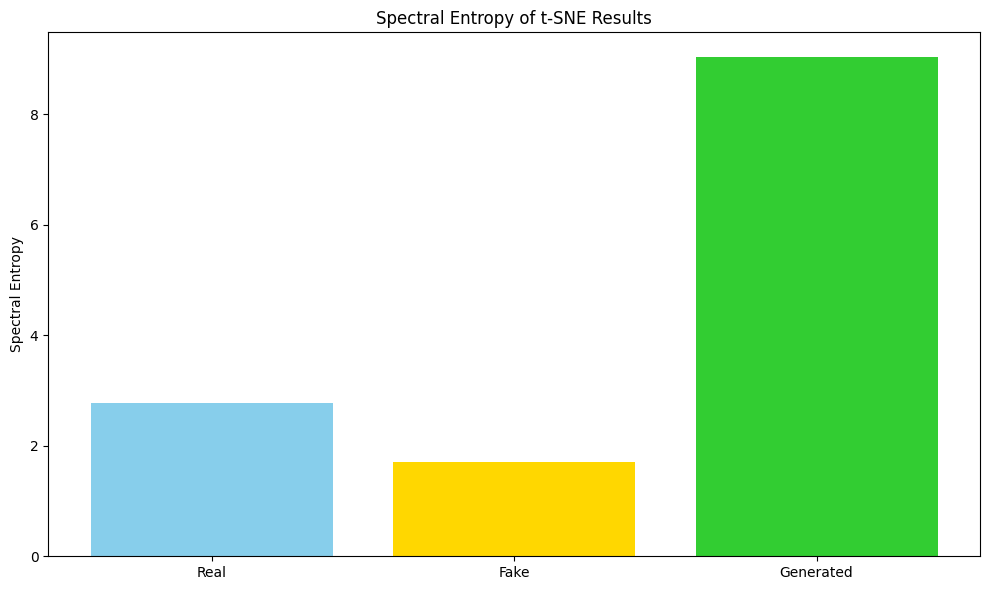

Spectral Entropy (Real): 2.7699
Spectral Entropy (Fake): 1.7068
Spectral Entropy (Generated): 9.0325


In [ ]:
#!pip install scipy
from scipy.fft import fft
from scipy.stats import entropy

def compute_spectral_entropy(data):
    """Compute spectral entropy of the data."""
    power_spectrum = np.abs(fft(data))**2
    power_spectrum /= np.sum(power_spectrum)  # Normalize
    return entropy(power_spectrum)

# Compute Spectral Entropy for t-SNE results
spectral_entropy_real = compute_spectral_entropy(input_results_normalized_adera_real.flatten())
spectral_entropy_fake = compute_spectral_entropy(input_results_normalized_adera_fake.flatten())
spectral_entropy_generated = compute_spectral_entropy(input_results_normalized_adera_generated.flatten())

# Plot Spectral Entropy
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(['Real', 'Fake', 'Generated'], [spectral_entropy_real, spectral_entropy_fake, spectral_entropy_generated], color=['#87CEEB', '#FFD700', '#32CD32'])
ax.set_title('Spectral Entropy of t-SNE Results')
ax.set_ylabel('Spectral Entropy')
plt.tight_layout()
plt.show()

print(f"Spectral Entropy (Real): {spectral_entropy_real:.4f}")
print(f"Spectral Entropy (Fake): {spectral_entropy_fake:.4f}")
print(f"Spectral Entropy (Generated): {spectral_entropy_generated:.4f}")


In [ ]:
from scipy.stats import ks_2samp

def compute_ks_test(data1, data2):
    """Compute Kolmogorov-Smirnov test between two datasets."""
    stat, p_value = ks_2samp(data1, data2)
    return stat, p_value

# Compute KS test for t-SNE results
ks_real_fake_stat, ks_real_fake_p = compute_ks_test(tsne1_result_adera_real.flatten(), tsne1_result_adera_fake.flatten())
ks_real_generated_stat, ks_real_generated_p = compute_ks_test(tsne1_result_adera_real.flatten(), tsne1_result_adera_generated.flatten())
ks_fake_generated_stat, ks_fake_generated_p = compute_ks_test(tsne1_result_adera_fake.flatten(), tsne1_result_adera_generated.flatten())

# Print KS test results
print(f"KS Test (Real vs Fake): Stat={ks_real_fake_stat:.4f}, p-value={ks_real_fake_p:.4f}")
print(f"KS Test (Real vs Generated): Stat={ks_real_generated_stat:.4f}, p-value={ks_real_generated_p:.4f}")
print(f"KS Test (Fake vs Generated): Stat={ks_fake_generated_stat:.4f}, p-value={ks_fake_generated_p:.4f}")


KS Test (Real vs Fake): Stat=0.4920, p-value=0.0000
KS Test (Real vs Generated): Stat=0.4920, p-value=0.0000
KS Test (Fake vs Generated): Stat=0.0134, p-value=0.3305


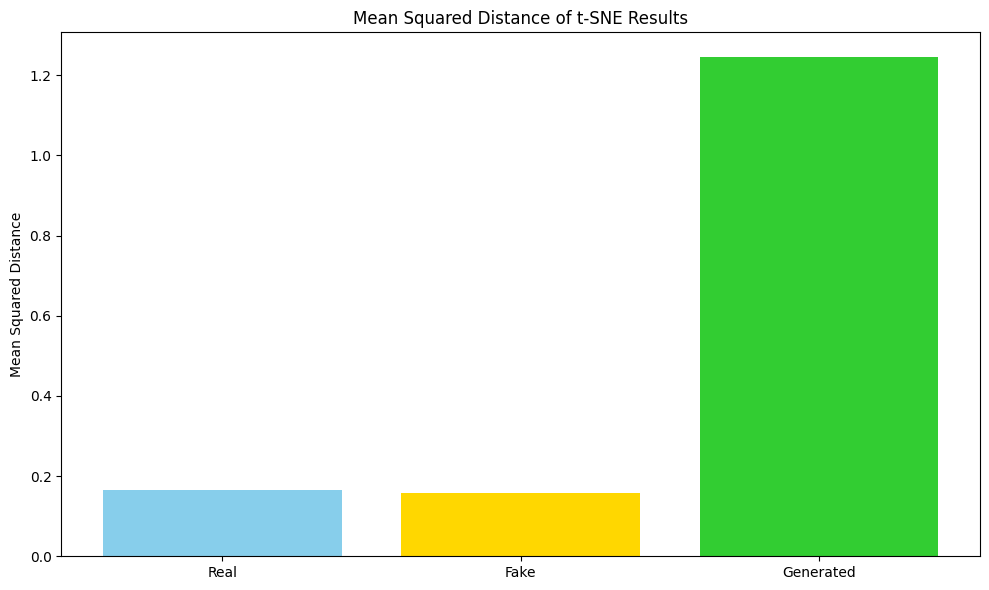

Mean Squared Distance (Real): 0.1652
Mean Squared Distance (Fake): 0.1583
Mean Squared Distance (Generated): 1.2446


In [ ]:
def compute_mean_squared_distance(data):
    """Compute mean squared distance of the data."""
    distances = np.mean(np.square(data[:, None] - data[None, :]), axis=1)
    return np.mean(distances)

# Compute Mean Squared Distance for t-SNE results
msd_real = compute_mean_squared_distance(input_results_normalized_adera_real.flatten())
msd_fake = compute_mean_squared_distance(input_results_normalized_adera_fake.flatten())
msd_generated = compute_mean_squared_distance(input_results_normalized_adera_generated.flatten())

# Plot Mean Squared Distance
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(['Real', 'Fake', 'Generated'], [msd_real, msd_fake, msd_generated], color=['#87CEEB', '#FFD700', '#32CD32'])
ax.set_title('Mean Squared Distance of t-SNE Results')
ax.set_ylabel('Mean Squared Distance')
plt.tight_layout()
plt.show()

print(f"Mean Squared Distance (Real): {msd_real:.4f}")
print(f"Mean Squared Distance (Fake): {msd_fake:.4f}")
print(f"Mean Squared Distance (Generated): {msd_generated:.4f}")


In [ ]:

########figure 6_Adera
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Load data
adera04 = pd.read_csv("adera_tcr_input_mkr5b.csv", sep=",", header=0)
adera04_210 = adera04.groupby('Gene_adera').apply(lambda x: x.sample(n=70, random_state=42)).reset_index(drop=True)

# Data preprocessing
adera_dimension_data_210 = 210  # Number of rows for TCR sequences
my_cols = 60  # Maximum number of amino acids per sequence
input_results_adera = np.zeros((adera_dimension_data_210, my_cols))

# Mapping function for amino acids
class_Adera = {aa: idx for idx, aa in enumerate("ACDEFGHIKLMNPQRSTVWY")}
#class_Adera = {"A": 11,"R": 12,"N": 13,"D": 14,"C":15,"E":16,"Q":17,"G":18,"H":19,"I":20,"L":21,"K":22,"M":23,"F":24,"P":25,"S":26,"T":27,"W":28,"Y":29,"V":30}

for i in range(adera_dimension_data_210):
    adera_outputstr = adera04_210.iloc[i, 0]  # Extract sequence
    for j in range(len(adera_outputstr)):
        kr1 = class_Adera.get(adera_outputstr[j], 0)  # Default to 0 if amino acid not found
        input_results_adera[i, j] = kr1

# Output labels
output_results_adera = adera04_210.iloc[:adera_dimension_data_210, 1].values

# Normalize input data
scaler = RobustScaler()
input_results_normalized = scaler.fit_transform(input_results_adera)

# Parameters
num_sequences = 210
latent_dim = 20

# Generate noise and transform it
noise = np.random.uniform(0, 1, (num_sequences, latent_dim))
noise_transformed_adera = noise * (30 - 11) + 11

# Generate sequences (This step seems to mimic the generation process, using normalized data directly)
generated_seqs_adera = input_results_normalized

# Rescale to the range 11 to 30
min_val, max_val = generated_seqs_adera.min(), generated_seqs_adera.max()
scaled_seqs_adera = 11 + (generated_seqs_adera - min_val) * (30 - 11) / (max_val - min_val)
generated_seqs_adera = np.clip(np.round(scaled_seqs_adera).astype(int), 11, 30)

# Shuffle the data before feeding into the discriminator
shuffled_indices = np.random.permutation(generated_seqs_adera.shape[0])
shuffled_seqs_adera = generated_seqs_adera[shuffled_indices]
shuffled_output_labels = output_results_adera[shuffled_indices]

# Discriminator predictions (assuming the discriminator model exists)
# discriminator_adera = Sequential([...])
generated_seq_probabilities = discriminator_adera.predict(shuffled_seqs_adera)

# Threshold to classify as Fake or Real
generated_seq_labels = (generated_seq_probabilities > 0.2497).astype(int)

# Map the labels to category names
category_mapping = {0: 'Fake', 1: 'Real'}
generated_seq_categories = [category_mapping[label[0]] for label in generated_seq_labels]

# Real output mapping (0:140 real, 141:210 fake)
real_output_categories = ['Real'] * 140 + ['Fake'] * 70

# Shuffle the real output categories to match the shuffled sequences
shuffled_real_output_categories = np.array(real_output_categories)[shuffled_indices]

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Sequence': adera04_210.iloc[shuffled_indices, 0],
    'Real Label': shuffled_real_output_categories,
    'Predicted Label': generated_seq_categories
})

# Show the first few rows of the table
print(results_df.head(20))

# You can also save the table to a CSV or visualize it in any other way
results_df.to_csv('predicted_vs_real_labels.csv', index=False)
results_df

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
                                              Sequence Real Label  \
170  RTDTENMEDCQNLLKPCSLCEKRPRDGNIIHGRTGHLVTCFHCARR...       Fake   
8                                      CASRALAGGQVEQFF       Real   
194  AQEKKFAVLLNSLILAKCFRCKLWENSLHVSKQLEKIGITLSNAIV...       Fake   
112                                       CAFMDSNYQLIW       Real   
139                                CAADTLLNAGGTSYGKLTF       Real   
94                                         CAANSGTYQRF       Real   
109                                    CAMTRSNFGNEKLTF       Real   
114                                    CATDAGYNQGGKLIF       Real   
62                                        CASSFSNQPQHF       Real   
13                                      CASSLLGGGGEAFF       Real   
152  AESEVGRPEEEEAEAAAGLELCSGSGPFTFLHFDKNFVQLCLSAEP...       Fake   
72                                      CAVDISNAGNMLTF       Real   
0                                       CASSVDGAYNEQFF       Real

,Sequence,Real Label,Predicted Label
170,RTDTENMEDCQNLLKPCSLCEKRPRDGNIIHGRTGHLVTCFHCARR...,Fake,Real
8,CASRALAGGQVEQFF,Real,Real
194,AQEKKFAVLLNSLILAKCFRCKLWENSLHVSKQLEKIGITLSNAIV...,Fake,Real
112,CAFMDSNYQLIW,Real,Real
139,CAADTLLNAGGTSYGKLTF,Real,Fake
...,...,...,...
115,CGLGDAGNMLTF,Real,Real
172,VINKGLFFLGSLIAISSTYLLIHYMSPRSFLRLRRPWNWIAHFRNT...,Fake,Real
185,ALEDVENLRHLILWSLLPGHTMETQAAQEPEDDLTPTPSVISVTSH...,Fake,Real
147,MKRTHLFIVGIYFLSSCRAEEGLNFPTYDGKDRVVSLSEKNFKQVL...,Fake,Real


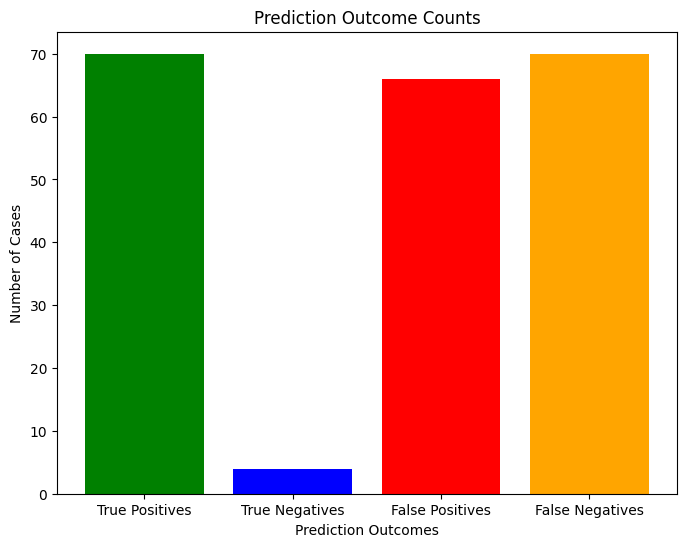

Counts of Prediction Outcomes:
{'True Positives': 70, 'True Negatives': 4, 'False Positives': 66, 'False Negatives': 70}


In [ ]:
####figure 6 continue
results_df
import pandas as pd
import matplotlib.pyplot as plt

# Assuming results_df is the DataFrame with your results
# Example structure:
# results_df = pd.DataFrame({
#     'Sequence': [...],
#     'Real Label': [...],
#     'Predicted Label': [...]
# })

# Counting the occurrences of each case
TP = len(results_df[(results_df['Real Label'] == 'Real') & (results_df['Predicted Label'] == 'Real')])
TN = len(results_df[(results_df['Real Label'] == 'Fake') & (results_df['Predicted Label'] == 'Fake')])
FP = len(results_df[(results_df['Real Label'] == 'Fake') & (results_df['Predicted Label'] == 'Real')])
FN = len(results_df[(results_df['Real Label'] == 'Real') & (results_df['Predicted Label'] == 'Fake')])

# Create a dictionary to hold the counts
results_counts = {'True Positives': TP, 'True Negatives': TN, 'False Positives': FP, 'False Negatives': FN}

# Plotting the results
plt.figure(figsize=(8, 6))
plt.bar(results_counts.keys(), results_counts.values(), color=['green', 'blue', 'red', 'orange'])
plt.xlabel('Prediction Outcomes')
plt.ylabel('Number of Cases')
plt.title('Prediction Outcome Counts')
plt.show()

# Print the counts as well for verification
print("Counts of Prediction Outcomes:")
print(results_counts)
